# Análise Exploratória de Dados (EDA) - Dataset de Sepsis

## Objetivo da Análise

* Compreender a estrutura e qualidade dos dados
* Analisar padrões de valores faltantes
* Identificar relações entre variáveis e a ocorrência de sepsis
* Gerar insights para construção de modelos preditivos

## Sobre o Dataset

* **Problema**: Detecção precoce de sepsis em pacientes de UTI
* **Tipo**: Classificação binária (Sepsis vs Não-Sepsis)
* **Características**: Dados de sinais vitais, exames laboratoriais e informações demográficas


## Importação das Bibliotecas

Primeiro, vamos importar todas as bibliotecas necessárias para nossa análise exploratória:

In [2]:
# Importação das bibliotecas essenciais para análise exploratória
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Configurações para otimizar as visualizações
warnings.filterwarnings('ignore')
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10


print("Bibliotecas importadas com sucesso")

Bibliotecas importadas com sucesso


## Carregamento e Estrutura do Dataset

Nesta seção, carregamos o dataset de treino e analisamos suas características básicas para compreender a estrutura dos dados e identificar possíveis problemas de qualidade.

In [3]:
# Carregamento do dataset de treino
train_df = pd.read_csv('dataset_sepsis_train.csv')

# Análise da estrutura básica do dataset
print("INFORMAÇÕES GERAIS DO DATASET")
print("=" * 50)
print(f"Dimensões do dataset (shape): {train_df.shape}")
print(f"Número de amostras: {train_df.shape[0]:,}")
print(f"Número de features: {train_df.shape[1]}")
print(f"Tamanho em memória: {train_df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print(f"\nINFORMAÇÕES DETALHADAS DO DATASET")
print("=" * 50)
# Usar info() para mostrar tipos de dados e valores não-nulos
train_df.info()

print(f"\nESTATÍSTICAS DESCRITIVAS (TRANSPOSTAS)")
print("=" * 50)
# Mostrar estatísticas descritivas transpostas para melhor visualização
display(train_df.describe().T)

print(f"\nNOMES DAS COLUNAS")
print("=" * 50)
print("Lista de todas as colunas:")
column_list = train_df.columns.tolist()
for i, col in enumerate(column_list, 1):
    print(f"{i:2d}. {col}")

# Verificar tipos de dados
print(f"\nTIPOS DE DADOS")
print("=" * 50)
tipos_dados = train_df.dtypes.value_counts()
for tipo, count in tipos_dados.items():
    print(f"{tipo}: {count} colunas")

# Visualizar as primeiras linhas
print(f"\nPRIMEIRAS 5 LINHAS DO DATASET")
print("=" * 50)
display(train_df.head())

INFORMAÇÕES GERAIS DO DATASET
Dimensões do dataset (shape): (1241768, 42)
Número de amostras: 1,241,768
Número de features: 42
Tamanho em memória: 397.91 MB

INFORMAÇÕES DETALHADAS DO DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1241768 entries, 0 to 1241767
Data columns (total 42 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Hour              1241768 non-null  int64  
 1   HR                1119123 non-null  float64
 2   O2Sat             1079708 non-null  float64
 3   Temp              419945 non-null   float64
 4   SBP               1060857 non-null  float64
 5   MAP               1087236 non-null  float64
 6   DBP               852691 non-null   float64
 7   Resp              1051181 non-null  float64
 8   EtCO2             46047 non-null    float64
 9   BaseExcess        67324 non-null    float64
 10  HCO3              52334 non-null    float64
 11  FiO2              103618 non-null   float64
 12  pH  

,count,mean,std,min,25%,50%,75%,max
Hour,1241768.0,25.508139,28.919805,0.00,9.00,19.00,33.000,335.00
HR,1119123.0,84.579588,17.324333,20.00,72.00,83.50,95.500,280.00
O2Sat,1079708.0,97.193465,2.931356,20.00,96.00,98.00,99.500,100.00
Temp,419945.0,36.976920,0.769576,23.00,36.50,37.00,37.500,50.00
SBP,1060857.0,123.758132,23.232263,20.00,107.00,121.00,138.000,300.00
MAP,1087236.0,82.404999,16.336194,20.00,71.00,80.00,92.000,300.00
DBP,852691.0,63.832984,13.953869,20.00,54.00,62.00,72.000,300.00
Resp,1051181.0,18.729819,5.095840,1.00,15.00,18.00,21.500,100.00
EtCO2,46047.0,32.957554,7.963042,10.00,28.00,33.00,38.000,100.00
BaseExcess,67324.0,-0.683697,4.300834,-30.00,-3.00,0.00,1.000,100.00



NOMES DAS COLUNAS
Lista de todas as colunas:
 1. Hour
 2. HR
 3. O2Sat
 4. Temp
 5. SBP
 6. MAP
 7. DBP
 8. Resp
 9. EtCO2
10. BaseExcess
11. HCO3
12. FiO2
13. pH
14. PaCO2
15. SaO2
16. AST
17. BUN
18. Alkalinephos
19. Calcium
20. Chloride
21. Creatinine
22. Bilirubin_direct
23. Glucose
24. Lactate
25. Magnesium
26. Phosphate
27. Potassium
28. Bilirubin_total
29. TroponinI
30. Hct
31. Hgb
32. PTT
33. WBC
34. Fibrinogen
35. Platelets
36. Age
37. Gender
38. Unit1
39. Unit2
40. HospAdmTime
41. ICULOS
42. SepsisLabel

TIPOS DE DADOS
float64: 41 colunas
int64: 1 colunas

PRIMEIRAS 5 LINHAS DO DATASET


,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,32,87.0,98.0,37.00,109.0,72.00,49.0,16.0,NaN,0.0,...,NaN,NaN,NaN,78.69,0.0,0.0,1.0,-64.69,33.0,0.0
1,16,114.0,100.0,36.94,118.0,68.67,NaN,20.0,NaN,NaN,...,NaN,NaN,NaN,76.34,0.0,NaN,NaN,-0.03,17.0,0.0
2,29,93.0,93.0,NaN,113.0,80.00,61.0,19.0,NaN,NaN,...,NaN,NaN,NaN,51.30,1.0,NaN,NaN,-177.25,32.0,0.0
3,6,104.0,96.0,38.20,112.0,73.00,56.0,18.0,NaN,NaN,...,NaN,NaN,NaN,66.55,1.0,0.0,1.0,-23.51,7.0,0.0
4,41,80.0,99.0,NaN,151.0,85.00,55.0,17.0,NaN,NaN,...,NaN,NaN,NaN,69.00,0.0,NaN,NaN,-64.40,42.0,0.0


## Separação de Features e Target

Separamos a variável alvo (SepsisLabel) das features para facilitar as análises subsequentes. Esta separação é fundamental para compreender a distribuição das classes e realizar análises bivariadas.

In [5]:
# Separação entre features (X) e variável target (y)
X_train = train_df.drop('SepsisLabel', axis=1)
y_train = train_df['SepsisLabel']

print(f"Features (X_train): {X_train.shape}")
print(f"Target (y_train): {y_train.shape}")

# Verificar se há duplicatas no dataset
duplicates = train_df.duplicated().sum()
print(f"\nLinhas duplicadas: {duplicates}")

# Análise de valores únicos por coluna
print(f"\nANÁLISE DE VALORES ÚNICOS POR COLUNA")
print("=" * 50)
unique_counts = train_df.nunique().sort_values(ascending=False)
print("Valores únicos por coluna:")
display(unique_counts.to_frame('Valores_Únicos'))

print(f"\nColunas com poucos valores únicos (potencialmente categóricas):")
few_unique = unique_counts[unique_counts <= 10]
if len(few_unique) > 0:
    display(few_unique.to_frame('Valores_Únicos'))
else:
    print("Nenhuma coluna com ≤10 valores únicos encontrada")

# Análise da distribuição da variável target
print(f"\nDISTRIBUIÇÃO DA VARIÁVEL TARGET")
print("=" * 50)
target_counts = y_train.value_counts().sort_index()
target_pct = y_train.value_counts(normalize=True).sort_index() * 100

for label, count in target_counts.items():
    pct = target_pct[label]
    status = "Não-Sepsis" if label == 0 else "Sepsis"
    print(f"{status} ({label}): {count:,} amostras ({pct:.2f}%)")

# Calcular razão de desbalanceamento
imbalance_ratio = target_counts[0] / target_counts[1]
print(f"\nRazão de desbalanceamento: {imbalance_ratio:.1f}:1")
print(f"Para cada caso de sepsis, existem {imbalance_ratio:.1f} casos de não-sepsis")

Features (X_train): (1241768, 41)
Target (y_train): (1241768,)

Linhas duplicadas: 1143

ANÁLISE DE VALORES ÚNICOS POR COLUNA
Valores únicos por coluna:


,Valores_Únicos
HospAdmTime,12156
Age,5987
TroponinI,2114
AST,1806
PTT,1334
Creatinine,1324
Lactate,1271
Glucose,1085
SBP,937
Platelets,924



Colunas com poucos valores únicos (potencialmente categóricas):


,Valores_Únicos
Unit1,2
Gender,2
Unit2,2
SepsisLabel,2



DISTRIBUIÇÃO DA VARIÁVEL TARGET
Não-Sepsis (0.0): 1,219,435 amostras (98.20%)
Sepsis (1.0): 22,333 amostras (1.80%)

Razão de desbalanceamento: 54.6:1
Para cada caso de sepsis, existem 54.6 casos de não-sepsis


## Visualização da Distribuição do Target

A visualização da distribuição da variável target é crucial para compreender o desequilíbrio entre as classes e suas implicações para o desenvolvimento de modelos preditivos.

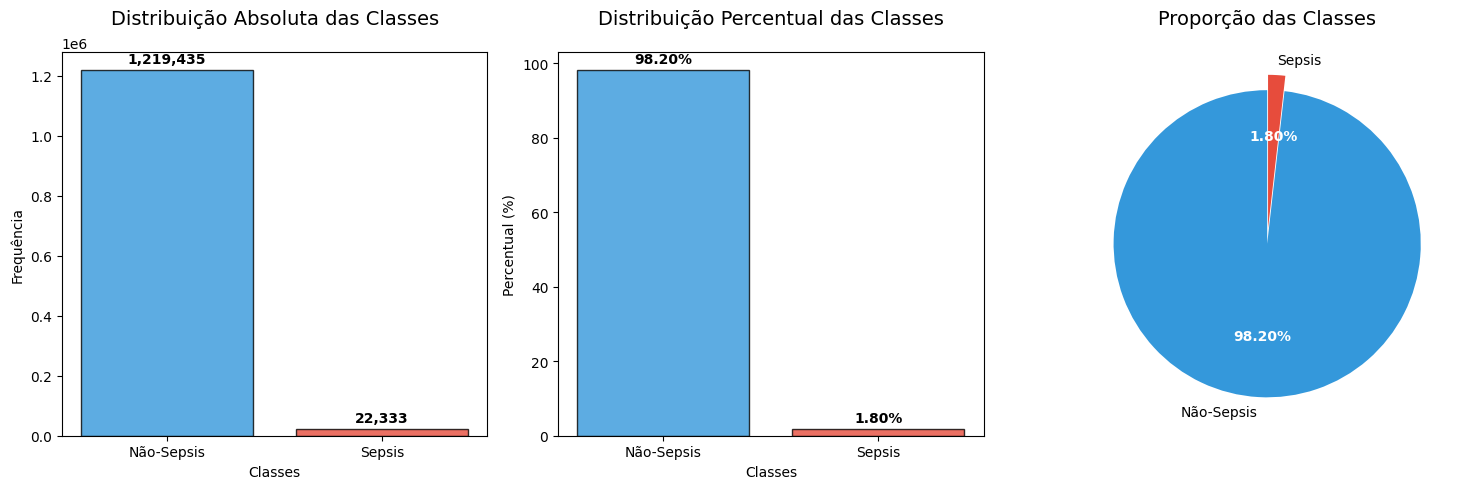

IMPLICAÇÕES DO DESBALANCEAMENTO
DATASET ALTAMENTE DESBALANCEADO!

Estratégias recomendadas:
- Utilizar métricas adequadas (F1-Score, AUC-ROC, Precision-Recall)
- Aplicar técnicas de balanceamento (SMOTE, undersampling)
- Configurar class_weight nos algoritmos de ML
- Considerar threshold optimization


In [6]:
# Visualização da distribuição da variável target
plt.figure(figsize=(15, 5))

# Gráfico 1: Contagem absoluta
plt.subplot(1, 3, 1)
bars = plt.bar(['Não-Sepsis', 'Sepsis'], target_counts.values, 
               color=['#3498db', '#e74c3c'], alpha=0.8, edgecolor='black')
plt.title('Distribuição Absoluta das Classes', fontsize=14, pad=20)
plt.xlabel('Classes')
plt.ylabel('Frequência')

# Adicionar valores nas barras
for bar, count in zip(bars, target_counts.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(target_counts)*0.01,
            f'{count:,}', ha='center', va='bottom', fontweight='bold')

# Gráfico 2: Distribuição percentual
plt.subplot(1, 3, 2)
bars = plt.bar(['Não-Sepsis', 'Sepsis'], target_pct.values, 
               color=['#3498db', '#e74c3c'], alpha=0.8, edgecolor='black')
plt.title('Distribuição Percentual das Classes', fontsize=14, pad=20)
plt.xlabel('Classes')
plt.ylabel('Percentual (%)')

# Adicionar valores nas barras
for bar, pct in zip(bars, target_pct.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(target_pct)*0.01,
            f'{pct:.2f}%', ha='center', va='bottom', fontweight='bold')

# Gráfico 3: Gráfico de pizza
plt.subplot(1, 3, 3)
wedges, texts, autotexts = plt.pie(target_pct.values, 
                                  labels=['Não-Sepsis', 'Sepsis'], 
                                  autopct='%1.2f%%', 
                                  colors=['#3498db', '#e74c3c'],
                                  startangle=90,
                                  explode=(0, 0.1))
plt.title('Proporção das Classes', fontsize=14, pad=20)

# Melhorar formatação dos rótulos
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

plt.tight_layout()
plt.show()

# Análise das implicações do desbalanceamento
print("IMPLICAÇÕES DO DESBALANCEAMENTO")
print("=" * 50)
if imbalance_ratio > 10:
    print("DATASET ALTAMENTE DESBALANCEADO!")
    print("\nEstratégias recomendadas:")
    print("- Utilizar métricas adequadas (F1-Score, AUC-ROC, Precision-Recall)")
    print("- Aplicar técnicas de balanceamento (SMOTE, undersampling)")
    print("- Configurar class_weight nos algoritmos de ML")
    print("- Considerar threshold optimization")

## Análise de Valores Faltantes

A análise sistemática de valores faltantes é essencial para identificar padrões de missings e definir estratégias de tratamento adequadas. Esta análise nos permite entender se os dados faltam de forma aleatória ou seguem algum padrão específico.

In [8]:
# Análise quantitativa dos valores faltantes
missing_count = X_train.isnull().sum()
missing_pct = (missing_count / len(X_train)) * 100

# Criar DataFrame para análise organizada
missing_df = pd.DataFrame({
    'Coluna': missing_count.index,
    'Valores_Faltantes': missing_count.values,
    'Porcentagem': missing_pct.values
}).sort_values('Porcentagem', ascending=False)

# Filtrar apenas colunas com valores faltantes
missing_with_nans = missing_df[missing_df['Valores_Faltantes'] > 0]

print("RESUMO DA ANÁLISE DE VALORES FALTANTES")
print("=" * 50)
print(f"Total de colunas: {len(X_train.columns)}")
print(f"Colunas com valores faltantes: {len(missing_with_nans)}")
print(f"Colunas sem valores faltantes: {len(X_train.columns) - len(missing_with_nans)}")

if len(missing_with_nans) > 0:
    print(f"\nTotal de valores faltantes: {missing_count.sum():,}")
    print(f"Porcentagem do dataset: {(missing_count.sum() / (len(X_train) * len(X_train.columns)))*100:.2f}%")

    print(f"\nPORCENTAGEM DE VALORES FALTANTES POR COLUNA")
    print("=" * 70)
    display(missing_with_nans)
else:
    print("Dataset sem valores faltantes detectados!")

RESUMO DA ANÁLISE DE VALORES FALTANTES
Total de colunas: 41
Colunas com valores faltantes: 37
Colunas sem valores faltantes: 4

Total de valores faltantes: 34,807,628
Porcentagem do dataset: 68.37%

PORCENTAGEM DE VALORES FALTANTES POR COLUNA


,Coluna,Valores_Faltantes,Porcentagem
21,Bilirubin_direct,1239375,99.807291
33,Fibrinogen,1233565,99.339410
28,TroponinI,1230025,99.054332
27,Bilirubin_total,1223250,98.508739
17,Alkalinephos,1221814,98.393098
15,AST,1221624,98.377797
23,Lactate,1208530,97.323333
31,PTT,1205078,97.045342
14,SaO2,1198991,96.555154
8,EtCO2,1195721,96.291819


## Visualização dos Padrões de Missing Values

A visualização dos padrões de valores faltantes nos ajuda a identificar se existe alguma estrutura nos dados ausentes e a definir estratégias de tratamento mais eficazes.

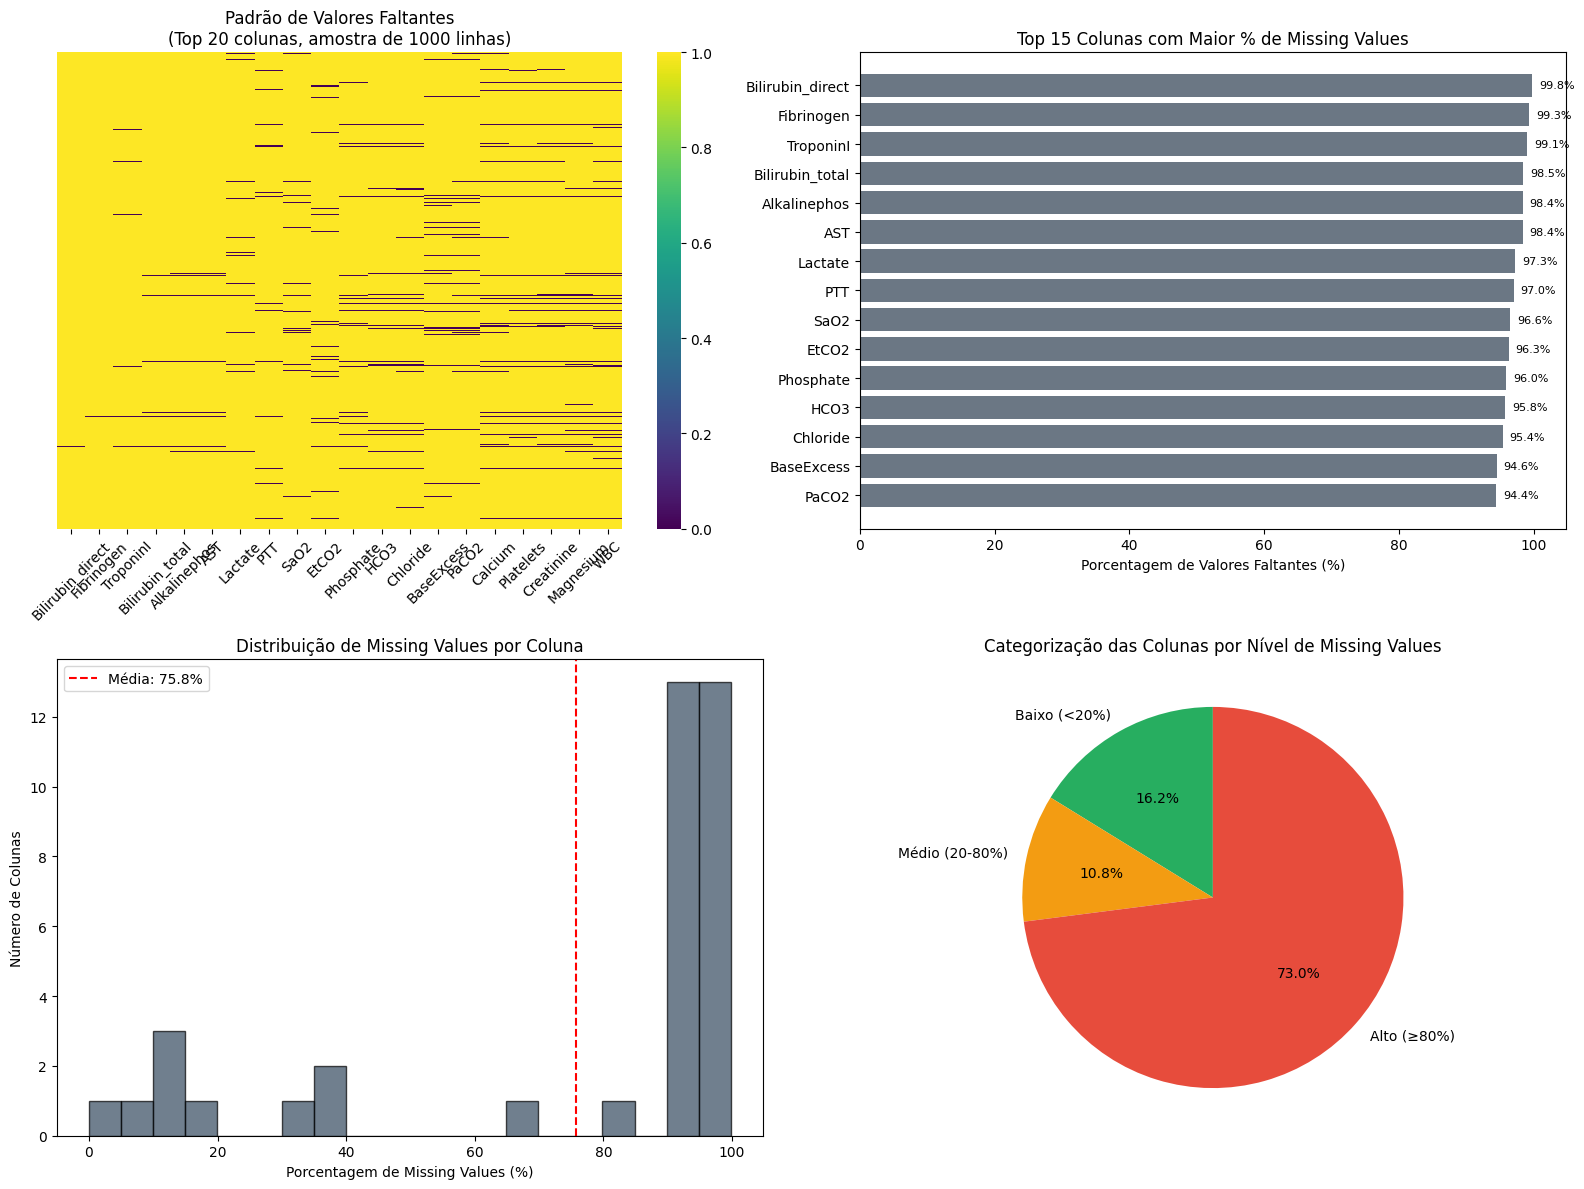

CATEGORIZAÇÃO POR NÍVEL DE MISSING VALUES
Baixo missing (<20%): 6 colunas
Médio missing (20-80%): 4 colunas
Alto missing (≥80%): 27 colunas

ESTRATÉGIAS DE TRATAMENTO RECOMENDADAS
Colunas com alto missing (≥80%): Considerar remoção
Colunas com médio missing (20-80%): Imputação específica por domínio
Colunas com baixo missing (<20%): Imputação simples (mediana/moda)


In [9]:
# Visualização dos padrões de valores faltantes
if len(missing_with_nans) > 0:
    # Configurar subplots
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. Heatmap dos valores faltantes (top 20 colunas)
    cols_with_nans = missing_with_nans.head(20)['Coluna'].tolist()
    
    if len(cols_with_nans) > 0:
        # Amostra para visualização eficiente
        sample_size = min(1000, len(X_train))
        sample_data = X_train[cols_with_nans].sample(n=sample_size, random_state=42)
        
        sns.heatmap(sample_data.isnull(), 
                   cbar=True, 
                   yticklabels=False,
                   cmap='viridis',
                   ax=axes[0,0])
        axes[0,0].set_title(f'Padrão de Valores Faltantes\n(Top 20 colunas, amostra de {sample_size} linhas)')
        axes[0,0].tick_params(axis='x', rotation=45)
    
    # 2. Gráfico de barras horizontais
    top_missing = missing_with_nans.head(15)
    bars = axes[0,1].barh(range(len(top_missing)), top_missing['Porcentagem'], 
                         color='#2c3e50', alpha=0.7)
    axes[0,1].set_yticks(range(len(top_missing)))
    axes[0,1].set_yticklabels(top_missing['Coluna'])
    axes[0,1].set_xlabel('Porcentagem de Valores Faltantes (%)')
    axes[0,1].set_title('Top 15 Colunas com Maior % de Missing Values')
    axes[0,1].invert_yaxis()
    
    # Adicionar valores nas barras
    for i, bar in enumerate(bars):
        width = bar.get_width()
        axes[0,1].text(width + 1, bar.get_y() + bar.get_height()/2, 
                      f'{width:.1f}%', ha='left', va='center', fontsize=8)
    
    # 3. Histograma da distribuição de missing values
    axes[1,0].hist(missing_with_nans['Porcentagem'], bins=20, alpha=0.7, 
                  color='#34495e', edgecolor='black')
    axes[1,0].set_xlabel('Porcentagem de Missing Values (%)')
    axes[1,0].set_ylabel('Número de Colunas')
    axes[1,0].set_title('Distribuição de Missing Values por Coluna')
    axes[1,0].axvline(missing_with_nans['Porcentagem'].mean(), 
                     color='red', linestyle='--', 
                     label=f'Média: {missing_with_nans["Porcentagem"].mean():.1f}%')
    axes[1,0].legend()
    
    # 4. Categorização dos missing values
    low_missing = missing_with_nans[missing_with_nans['Porcentagem'] < 20]
    medium_missing = missing_with_nans[(missing_with_nans['Porcentagem'] >= 20) & 
                                      (missing_with_nans['Porcentagem'] < 80)]
    high_missing = missing_with_nans[missing_with_nans['Porcentagem'] >= 80]
    
    categories = ['Baixo (<20%)', 'Médio (20-80%)', 'Alto (≥80%)']
    counts = [len(low_missing), len(medium_missing), len(high_missing)]
    colors = ['#27ae60', '#f39c12', '#e74c3c']
    
    wedges, texts, autotexts = axes[1,1].pie(counts, labels=categories, autopct='%1.1f%%', 
                                            colors=colors, startangle=90)
    axes[1,1].set_title('Categorização das Colunas por Nível de Missing Values')
    
    plt.tight_layout()
    plt.show()
    
    # Análise estatística dos missing values
    print("CATEGORIZAÇÃO POR NÍVEL DE MISSING VALUES")
    print("=" * 50)
    print(f"Baixo missing (<20%): {len(low_missing)} colunas")
    print(f"Médio missing (20-80%): {len(medium_missing)} colunas")  
    print(f"Alto missing (≥80%): {len(high_missing)} colunas")
    
    print(f"\nESTRATÉGIAS DE TRATAMENTO RECOMENDADAS")
    print("=" * 50)
    print("Colunas com alto missing (≥80%): Considerar remoção")
    print("Colunas com médio missing (20-80%): Imputação específica por domínio")
    print("Colunas com baixo missing (<20%): Imputação simples (mediana/moda)")
    
else:
    print("Nenhum valor faltante encontrado para visualização!")

## Análise Univariada Detalhada

A análise univariada examina cada variável individualmente para compreender suas distribuições, identificar outliers e avaliar características estatísticas importantes como assimetria e curtose.

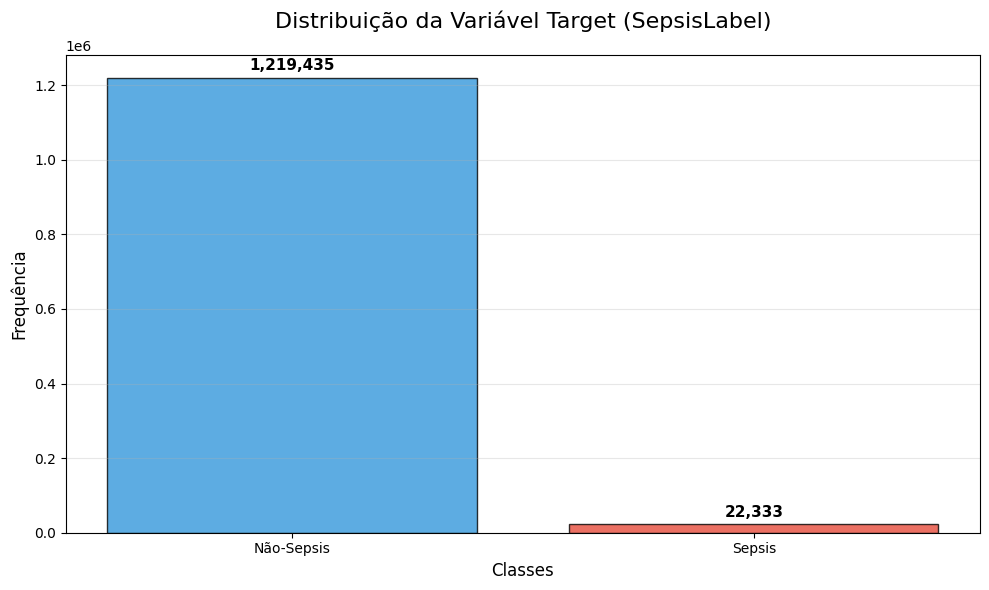

Interpretação:
- Dataset altamente desbalanceado com razão 54.6:1
- Classe majoritária (Não-Sepsis): 1,219,435 amostras (98.20%)
- Classe minoritária (Sepsis): 22,333 amostras (1.80%)


In [ ]:
# 1. Bar Plot para distribuição da variável target
plt.figure(figsize=(10, 6))

# Contagem de valores da variável target
target_counts = y_train.value_counts().sort_index()
labels = ['Não-Sepsis', 'Sepsis']
colors = ['#3498db', '#e74c3c']

bars = plt.bar(labels, target_counts.values, color=colors, alpha=0.8, edgecolor='black')
plt.title('Distribuição da Variável Target (SepsisLabel)', fontsize=16, pad=20)
plt.xlabel('Classes', fontsize=12)
plt.ylabel('Frequência', fontsize=12)

# Adicionar valores nas barras
for bar, count in zip(bars, target_counts.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(target_counts)*0.01,
            f'{count:,}', ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Interpretação:")
print(f"- Dataset altamente desbalanceado com razão {imbalance_ratio:.1f}:1")
print(f"- Classe majoritária (Não-Sepsis): {target_counts[0]:,} amostras ({target_pct[0]:.2f}%)")
print(f"- Classe minoritária (Sepsis): {target_counts[1]:,} amostras ({target_pct[1]:.2f}%)")

Analisando 10 variáveis numéricas com <30% missing values


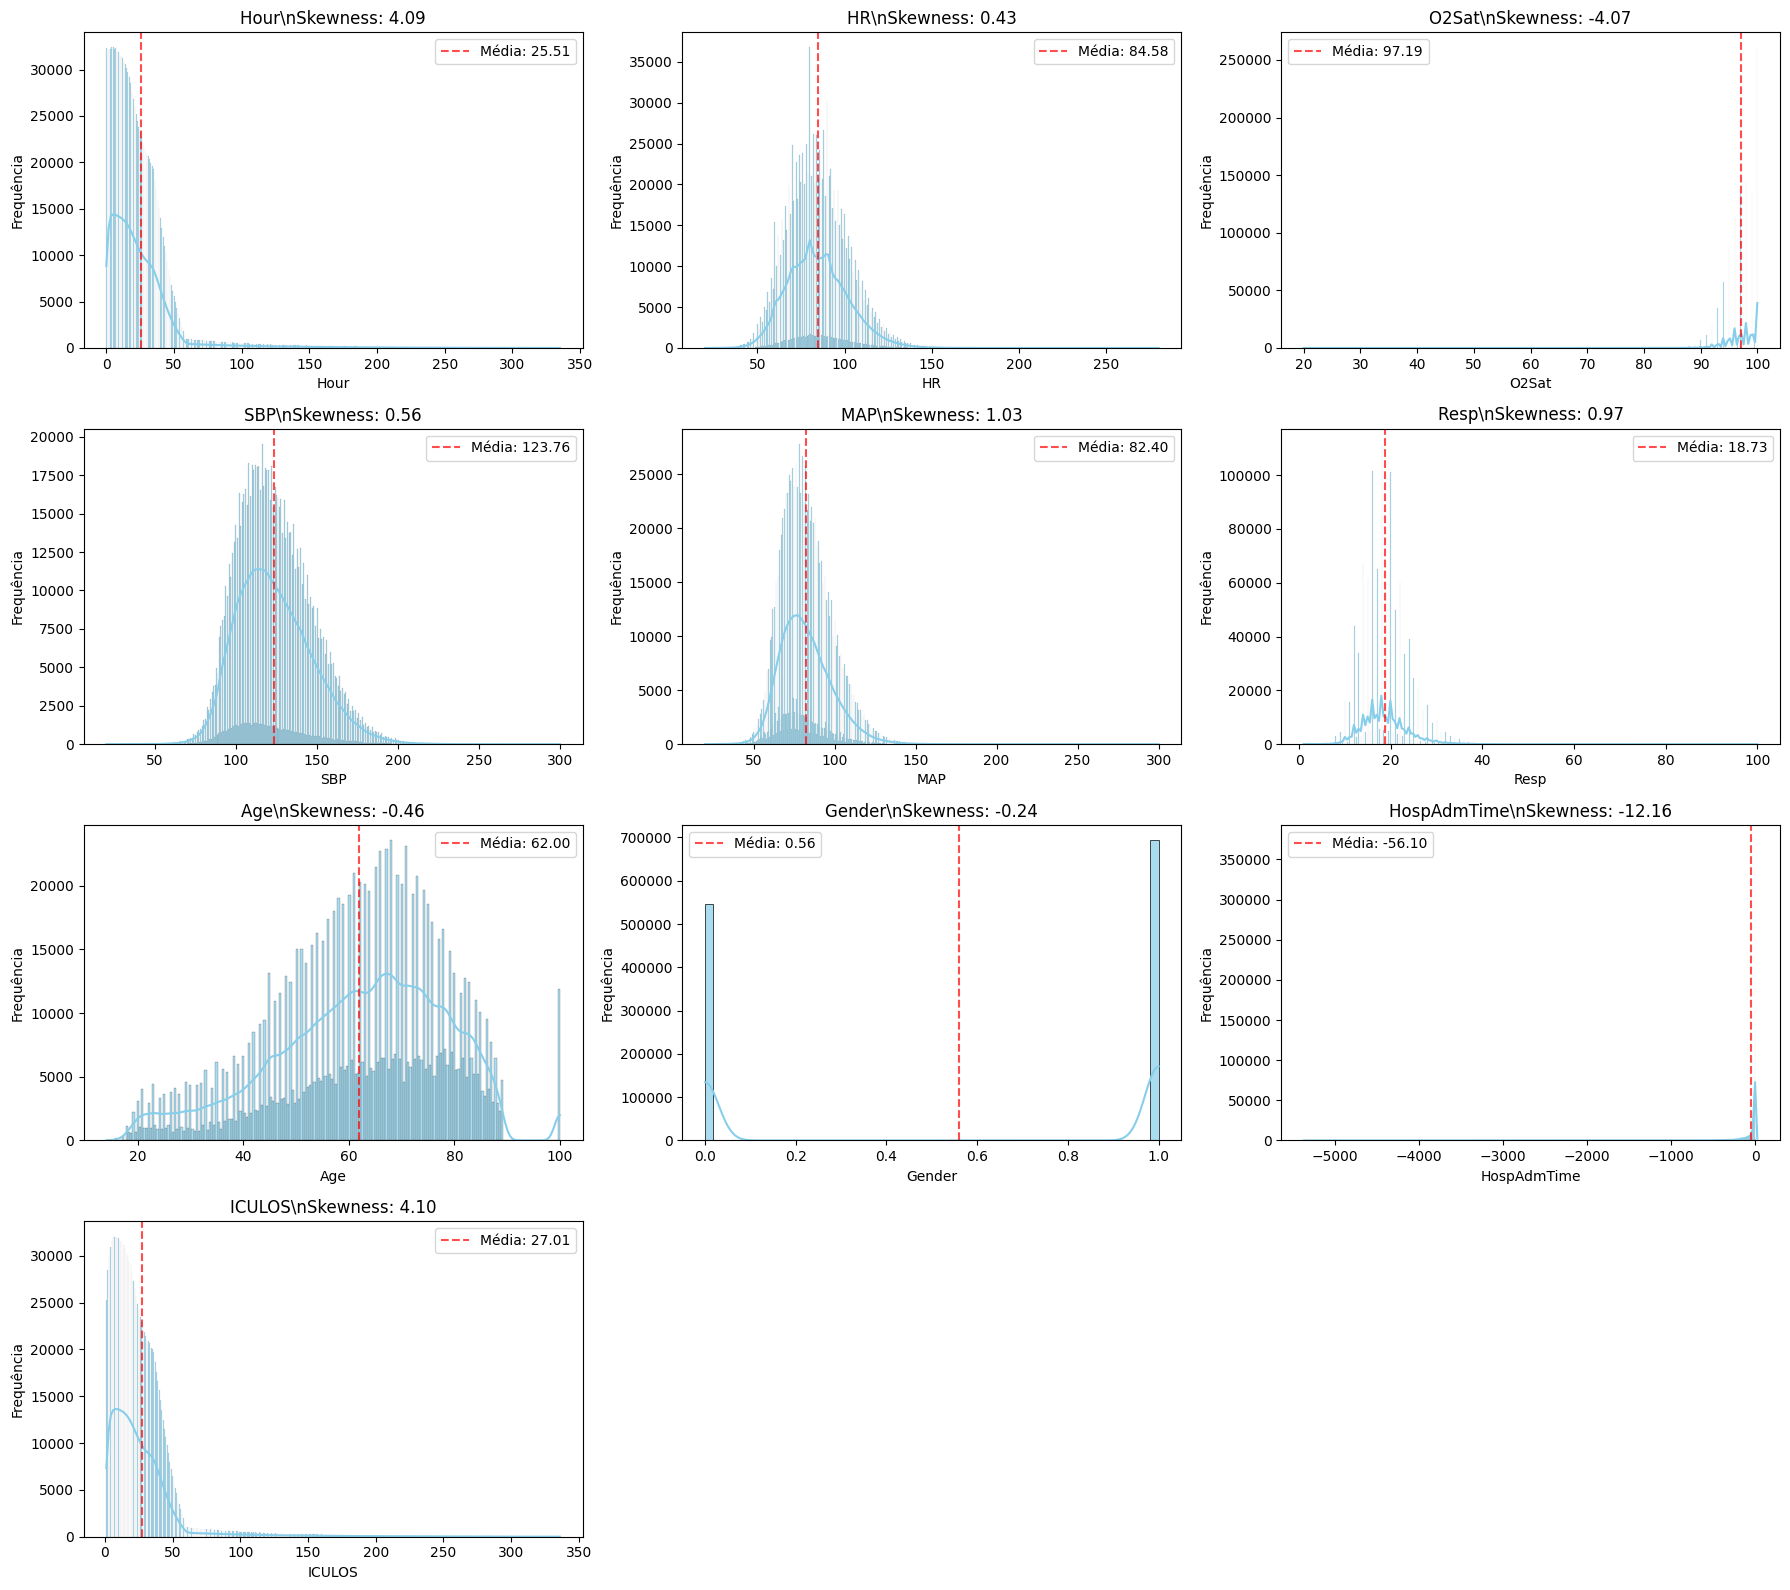

\nANÁLISE DE ASSIMETRIA (SKEWNESS)
Interpretação:
- Skewness = 0: Distribuição simétrica
- Skewness > 1: Fortemente assimétrica à direita
- Skewness < -1: Fortemente assimétrica à esquerda
- -1 ≤ Skewness ≤ 1: Moderadamente assimétrica ou simétrica
\nResumo das 10 variáveis analisadas:
  Hour: 4.09 (Fortemente assimétrica à direita)
  HR: 0.43 (Aproximadamente simétrica)
  O2Sat: -4.07 (Fortemente assimétrica à esquerda)
  SBP: 0.56 (Moderadamente assimétrica)
  MAP: 1.03 (Fortemente assimétrica à direita)
  Resp: 0.97 (Moderadamente assimétrica)
  Age: -0.46 (Aproximadamente simétrica)
  Gender: -0.24 (Aproximadamente simétrica)
  HospAdmTime: -12.16 (Fortemente assimétrica à esquerda)
  ICULOS: 4.10 (Fortemente assimétrica à direita)


In [ ]:
# 2. Histogramas com KDE para análise de distribuição das variáveis numéricas

# Selecionar variáveis numéricas com baixo percentual de missing values
numerical_columns = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Filtrar colunas com menos de 30% de valores faltantes para análise
low_missing_cols = []
for col in numerical_columns:
    missing_pct = X_train[col].isnull().sum() / len(X_train) * 100
    if missing_pct < 30:
        low_missing_cols.append(col)

print(f"Analisando {len(low_missing_cols)} variáveis numéricas com <30% missing values")

# Criar subplots para histogramas com KDE
if len(low_missing_cols) > 0:
    # Selecionar as primeiras 12 variáveis para visualização
    cols_to_plot = low_missing_cols[:12]
    
    n_cols = 3
    n_rows = (len(cols_to_plot) + n_cols - 1) // n_cols
    
    plt.figure(figsize=(18, n_rows * 4))
    
    for idx, feature in enumerate(cols_to_plot, 1):
        plt.subplot(n_rows, n_cols, idx)
        
        # Calcular skewness (assimetria)
        skewness = X_train[feature].skew()
        
        # Plotar histograma com KDE
        sns.histplot(X_train[feature].dropna(), kde=True, alpha=0.7, color='skyblue')
        plt.title(f"{feature} - Skewness: {skewness:.2f}", fontsize=12)
        plt.xlabel(feature)
        plt.ylabel('Frequência')
        
        # Adicionar linha vertical para a média
        mean_val = X_train[feature].mean()
        plt.axvline(mean_val, color='red', linestyle='--', alpha=0.7, label=f'Média: {mean_val:.2f}')
        plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Análise de skewness
    print("\\nANÁLISE DE ASSIMETRIA (SKEWNESS)")
    print("=" * 50)
    print("Interpretação:")
    print("- Skewness = 0: Distribuição simétrica")
    print("- Skewness > 1: Fortemente assimétrica à direita")
    print("- Skewness < -1: Fortemente assimétrica à esquerda")
    print("- -1 ≤ Skewness ≤ 1: Moderadamente assimétrica ou simétrica")
    
    print(f"\\nResumo das {len(cols_to_plot)} variáveis analisadas:")
    for col in cols_to_plot:
        skew_val = X_train[col].skew()
        if skew_val > 1:
            interpretation = "Fortemente assimétrica à direita"
        elif skew_val < -1:
            interpretation = "Fortemente assimétrica à esquerda"
        elif abs(skew_val) < 0.5:
            interpretation = "Aproximadamente simétrica"
        else:
            interpretation = "Moderadamente assimétrica"
        
        print(f"  {col}: {skew_val:.2f} ({interpretation})")

else:
    print("Nenhuma variável numérica com baixo missing encontrada para análise.")

In [ ]:
# 3. Swarm Plot para identificar outliers (Não rodar essa célula: muito exemplos para rodar de uma vez)
# Obs: usar amostragem para conseguir usar o swarm plot
# Análise de outliers em variáveis importantes vs target

# Selecionar algumas variáveis importantes para análise de outliers
important_vars = ['HR', 'SBP', 'DBP', 'Temp', 'Resp', 'O2Sat', 'Age']
available_vars = [col for col in important_vars if col in X_train.columns]

if not available_vars:
    # Se as variáveis importantes não existem, pegar as primeiras numéricas
    available_vars = low_missing_cols[:4] if low_missing_cols else []

if len(available_vars) > 0:
    # Criar subplots para swarm plots
    n_vars = min(4, len(available_vars))  # Limitar a 4 para não sobrecarregar
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.flatten()
    
    for idx, var in enumerate(available_vars[:n_vars]):
        # Preparar dados removendo NaN
        temp_df = pd.DataFrame({
            'variable': X_train[var],
            'target': y_train
        }).dropna()
        
        # Converter target para string para melhor visualização
        temp_df['target_str'] = temp_df['target'].map({0: 'Não-Sepsis', 1: 'Sepsis'})
        
        if len(temp_df) > 0:
            # Criar swarm plot
            sns.swarmplot(data=temp_df, x='target_str', y='variable', 
                         palette=['#3498db', '#e74c3c'], alpha=0.6, ax=axes[idx])
            axes[idx].set_title(f'Swarm Plot: {var} vs SepsisLabel', fontsize=12)
            axes[idx].set_xlabel('SepsisLabel')
            axes[idx].set_ylabel(var)
            
            # Adicionar informações estatísticas
            stats_0 = temp_df[temp_df['target'] == 0]['variable'].describe()
            stats_1 = temp_df[temp_df['target'] == 1]['variable'].describe()
            
            info_text = f"Não-Sepsis: μ={stats_0['mean']:.2f}\\nSepsis: μ={stats_1['mean']:.2f}"
            axes[idx].text(0.02, 0.98, info_text, transform=axes[idx].transAxes,
                          verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
                          fontsize=9)
        else:
            axes[idx].text(0.5, 0.5, f'Dados insuficientes\\npara {var}', 
                          transform=axes[idx].transAxes, ha='center', va='center')
            axes[idx].set_title(f'{var} - Sem dados')
    
    # Remover subplots vazios
    for i in range(n_vars, len(axes)):
        fig.delaxes(axes[i])
    
    plt.tight_layout()
    plt.show()
    
    print("\\nINTERPRETAÇÃO DOS SWARM PLOTS:")
    print("=" * 50)
    print("- Pontos isolados e distantes dos clusters principais = outliers")
    print("- Densidade maior de pontos = concentração de valores")
    print("- Diferentes posições verticais entre classes = possível discriminação")
    print("- Sobreposição entre classes = dificuldade de separação")
    
else:
    print("Nenhuma variável disponível para análise de outliers com swarm plot.")

## Análise Bivariada

A análise bivariada examina as relações entre duas variáveis, ajudando a identificar padrões, dependências e correlações que podem ser cruciais para o desenvolvimento de modelos preditivos.

Usando amostra de 5000 registros para pairplot (de 1241768 total)
\nCriando Pair Plot com 4055 amostras válidas...
Variáveis incluídas: ['Hour', 'HR', 'O2Sat', 'SBP', 'MAP']


<Figure size 1500x1200 with 0 Axes>

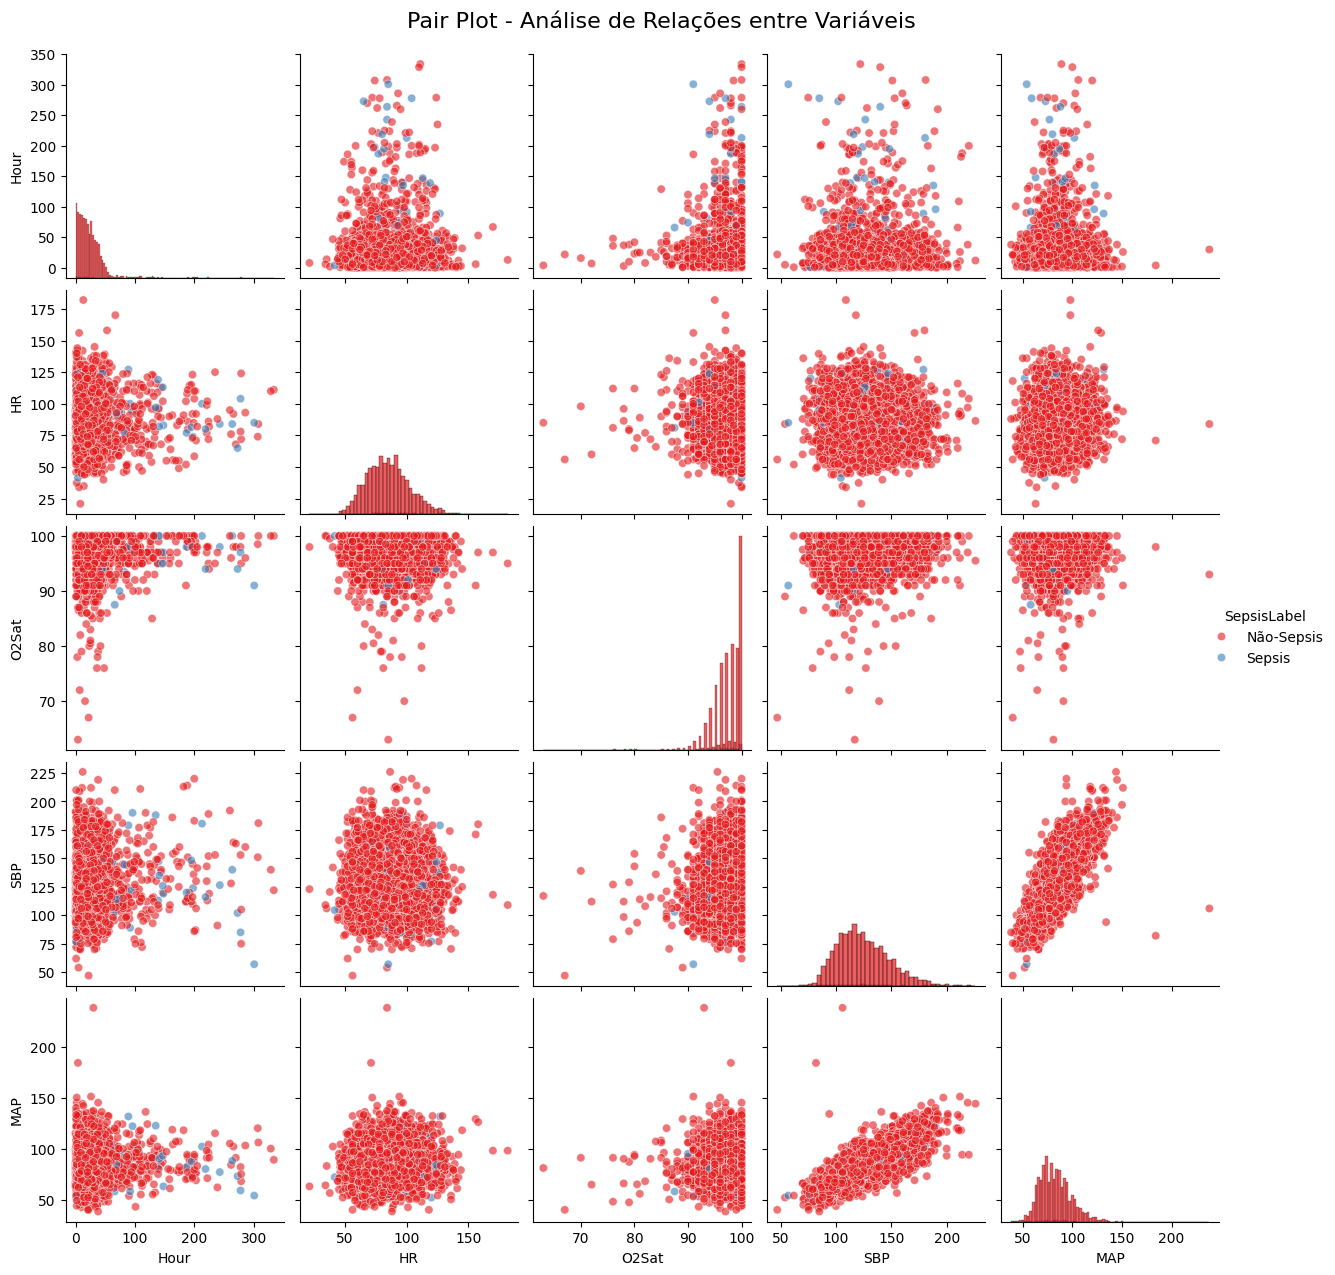

\nINTERPRETAÇÃO DO PAIR PLOT:
- Diagonal: Histogramas mostram a distribuição individual de cada variável
- Triângulo inferior/superior: Scatter plots mostram relações entre pares de variáveis
- Cores diferentes: Separação por classe (Sepsis vs Não-Sepsis)
- Padrões lineares nos scatter plots: Possíveis correlações
- Separação clara entre cores: Potencial discriminativo da variável


In [13]:
# 1. Pair Plot para mostrar distribuições e relações entre variáveis
# Selecionar um subconjunto de variáveis para o pairplot (para performance)

# Pegar variáveis com baixo missing e adicionar o target
pairplot_vars = []
if len(low_missing_cols) > 0:
    # Selecionar as 5 primeiras variáveis numéricas com baixo missing
    pairplot_vars = low_missing_cols[:5]

# Criar DataFrame para pairplot incluindo o target
if len(pairplot_vars) > 0:
    pairplot_data = X_train[pairplot_vars].copy()
    pairplot_data['SepsisLabel'] = y_train
    
    # Amostrar dados se o dataset for muito grande (para performance)
    if len(pairplot_data) > 5000:
        pairplot_sample = pairplot_data.sample(n=5000, random_state=42)
        print(f"Usando amostra de 5000 registros para pairplot (de {len(pairplot_data)} total)")
    else:
        pairplot_sample = pairplot_data
        print(f"Usando todos os {len(pairplot_data)} registros para pairplot")
    
    # Remover linhas com valores faltantes para o pairplot
    pairplot_sample = pairplot_sample.dropna()
    
    if len(pairplot_sample) > 0:
        print(f"\\nCriando Pair Plot com {len(pairplot_sample)} amostras válidas...")
        print(f"Variáveis incluídas: {pairplot_vars}")
        
        # Configurar paleta de cores
        sns.set_palette("Set1")
        
        # Criar pairplot
        plt.figure(figsize=(15, 12))
        
        # Pairplot com diferenciação por classe
        pair_grid = sns.pairplot(pairplot_sample, hue='SepsisLabel', 
                                diag_kind='hist', 
                                plot_kws={'alpha': 0.6},
                                diag_kws={'alpha': 0.7})
        
        # Personalizar a legenda
        pair_grid._legend.set_title("SepsisLabel")
        for text, label in zip(pair_grid._legend.get_texts(), ['Não-Sepsis', 'Sepsis']):
            text.set_text(label)
        
        plt.suptitle('Pair Plot - Análise de Relações entre Variáveis', y=1.02, fontsize=16)
        plt.show()
        
        print("\\nINTERPRETAÇÃO DO PAIR PLOT:")
        print("=" * 50)
        print("- Diagonal: Histogramas mostram a distribuição individual de cada variável")
        print("- Triângulo inferior/superior: Scatter plots mostram relações entre pares de variáveis")
        print("- Cores diferentes: Separação por classe (Sepsis vs Não-Sepsis)")
        print("- Padrões lineares nos scatter plots: Possíveis correlações")
        print("- Separação clara entre cores: Potencial discriminativo da variável")
        
    else:
        print("Dados insuficientes após remoção de valores faltantes para pairplot.")
        
else:
    print("Nenhuma variável numérica disponível para pairplot.")

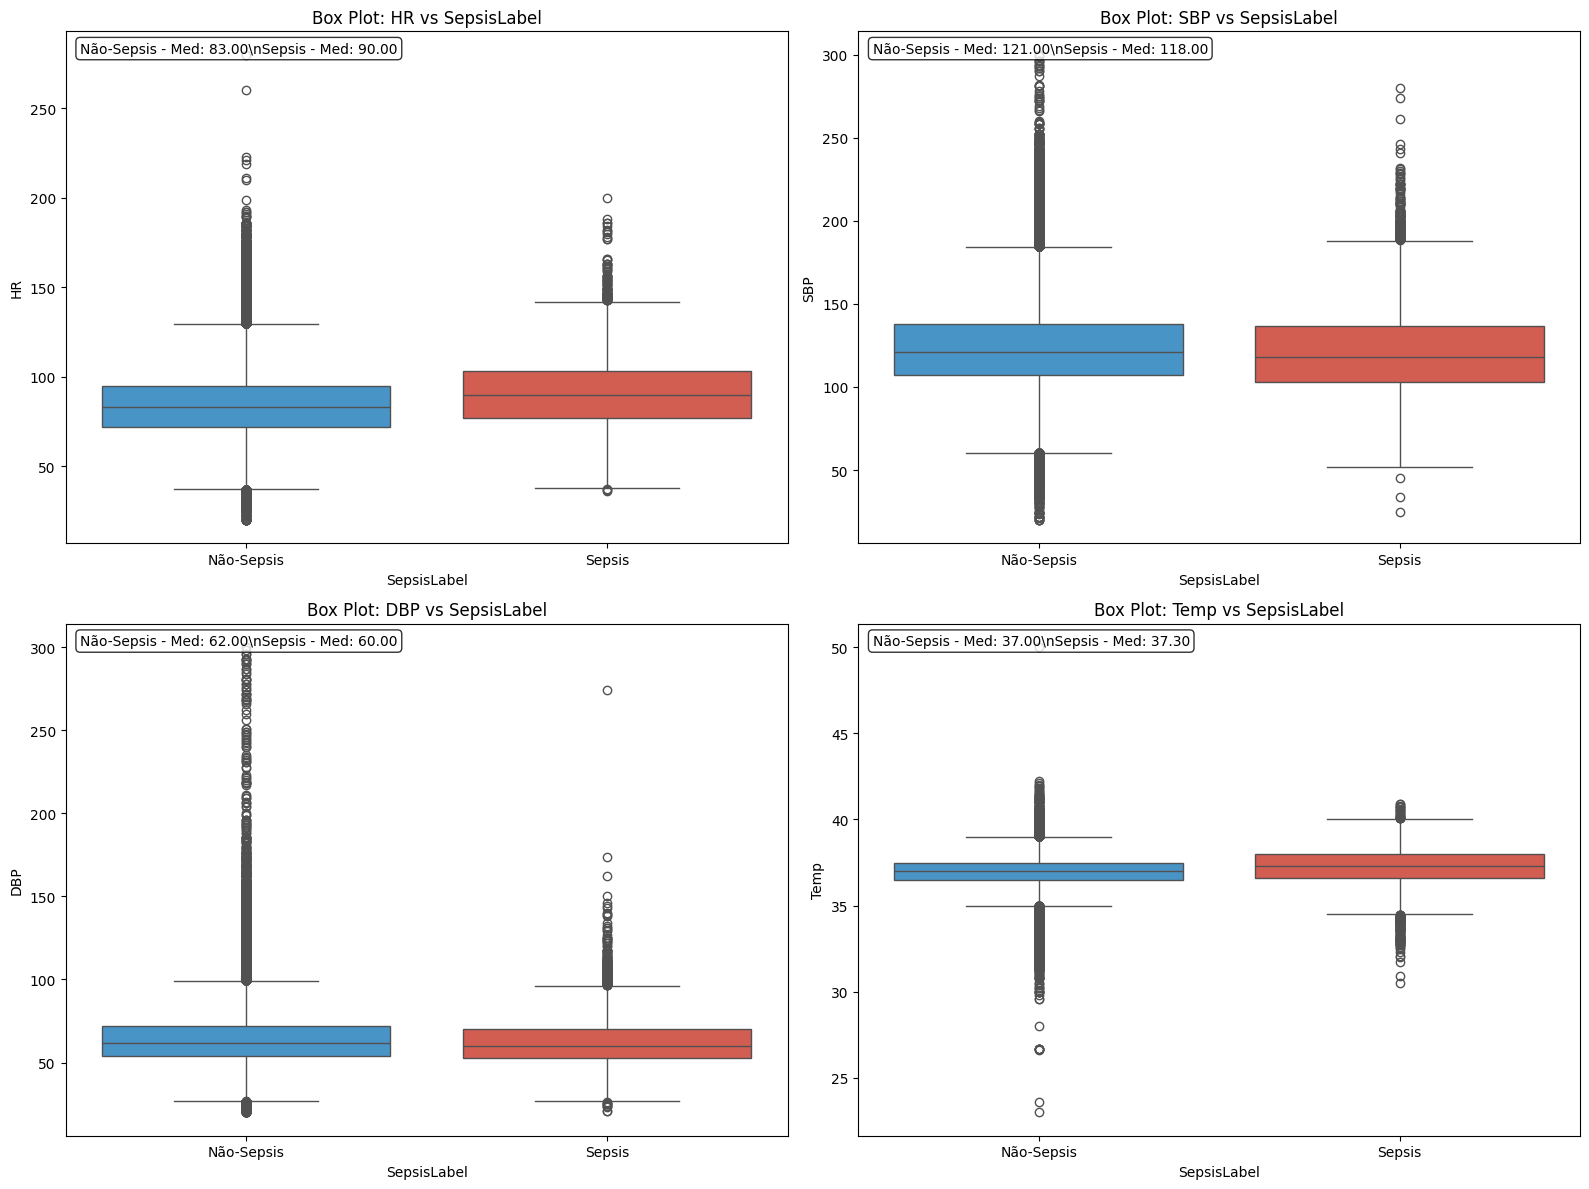

\nINTERPRETAÇÃO DOS BOX PLOTS:
- Caixa (box): Representa o IQR (Intervalo Interquartil)
- Linha central: Mediana da distribuição
- Whiskers (bigodes): Extensão até valores dentro de 1.5×IQR
- Pontos individuais: Outliers (valores extremos)
- Caixas mais longas: Maior variabilidade nos dados
- Diferenças entre medianas das classes: Potencial discriminativo
\nANÁLISE ESTATÍSTICA DAS DIFERENÇAS:
HR:
  Diferença de medianas (Sepsis - Não-Sepsis): 7.000
  Diferença de médias (Sepsis - Não-Sepsis): 6.271
SBP:
  Diferença de medianas (Sepsis - Não-Sepsis): -3.000
  Diferença de médias (Sepsis - Não-Sepsis): -2.277
DBP:
  Diferença de medianas (Sepsis - Não-Sepsis): -2.000
  Diferença de médias (Sepsis - Não-Sepsis): -1.832
Temp:
  Diferença de medianas (Sepsis - Não-Sepsis): 0.300
  Diferença de médias (Sepsis - Não-Sepsis): 0.278


In [14]:
# 2. Box Plots para análise de distribuições por classe
# Examinar como variáveis numéricas se comportam para cada classe do target

# Selecionar variáveis para box plots
boxplot_vars = available_vars[:4] if available_vars else low_missing_cols[:4]

if len(boxplot_vars) > 0:
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.flatten()
    
    for idx, var in enumerate(boxplot_vars):
        # Preparar dados
        temp_df = pd.DataFrame({
            'variable': X_train[var],
            'target': y_train
        }).dropna()
        
        # Converter target para labels descritivos
        temp_df['target_str'] = temp_df['target'].map({0: 'Não-Sepsis', 1: 'Sepsis'})
        
        if len(temp_df) > 0:
            # Criar box plot
            sns.boxplot(data=temp_df, x='target_str', y='variable', 
                       palette=['#3498db', '#e74c3c'], ax=axes[idx])
            axes[idx].set_title(f'Box Plot: {var} vs SepsisLabel', fontsize=12)
            axes[idx].set_xlabel('SepsisLabel')
            axes[idx].set_ylabel(var)
            
            # Calcular e mostrar estatísticas
            stats_by_class = temp_df.groupby('target')['variable'].agg(['median', 'mean', 'std']).round(2)
            
            # Adicionar informações estatísticas
            info_text = f"Não-Sepsis - Med: {stats_by_class.loc[0, 'median']:.2f}\\n"
            info_text += f"Sepsis - Med: {stats_by_class.loc[1, 'median']:.2f}"
            
            axes[idx].text(0.02, 0.98, info_text, transform=axes[idx].transAxes,
                          verticalalignment='top', 
                          bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
                          fontsize=10)
        else:
            axes[idx].text(0.5, 0.5, f'Dados insuficientes\\npara {var}', 
                          transform=axes[idx].transAxes, ha='center', va='center')
            axes[idx].set_title(f'{var} - Sem dados')
    
    plt.tight_layout()
    plt.show()
    
    print("\\nINTERPRETAÇÃO DOS BOX PLOTS:")
    print("=" * 50)
    print("- Caixa (box): Representa o IQR (Intervalo Interquartil)")
    print("- Linha central: Mediana da distribuição")
    print("- Whiskers (bigodes): Extensão até valores dentro de 1.5×IQR")
    print("- Pontos individuais: Outliers (valores extremos)")
    print("- Caixas mais longas: Maior variabilidade nos dados")
    print("- Diferenças entre medianas das classes: Potencial discriminativo")
    
    # Análise estatística das diferenças
    print("\\nANÁLISE ESTATÍSTICA DAS DIFERENÇAS:")
    print("=" * 50)
    
    for var in boxplot_vars:
        if var in X_train.columns:
            temp_df = pd.DataFrame({
                'variable': X_train[var],
                'target': y_train
            }).dropna()
            
            if len(temp_df) > 10:  # Mínimo de dados para análise
                group_0 = temp_df[temp_df['target'] == 0]['variable']
                group_1 = temp_df[temp_df['target'] == 1]['variable']
                
                if len(group_0) > 0 and len(group_1) > 0:
                    median_diff = group_1.median() - group_0.median()
                    mean_diff = group_1.mean() - group_0.mean()
                    
                    print(f"{var}:")
                    print(f"  Diferença de medianas (Sepsis - Não-Sepsis): {median_diff:.3f}")
                    print(f"  Diferença de médias (Sepsis - Não-Sepsis): {mean_diff:.3f}")
    
else:
    print("Nenhuma variável disponível para box plots.")

## Análise Multivariada

A análise multivariada examina as interações entre múltiplas variáveis simultaneamente, identificando padrões complexos e correlações que podem não ser aparentes na análise univariada ou bivariada.

MATRIZ DE CORRELAÇÃO
Analisando correlações entre 10 variáveis numéricas
Variáveis incluídas: ['Hour', 'HR', 'O2Sat', 'SBP', 'MAP', 'Resp', 'Age', 'Gender', 'HospAdmTime', 'ICULOS']


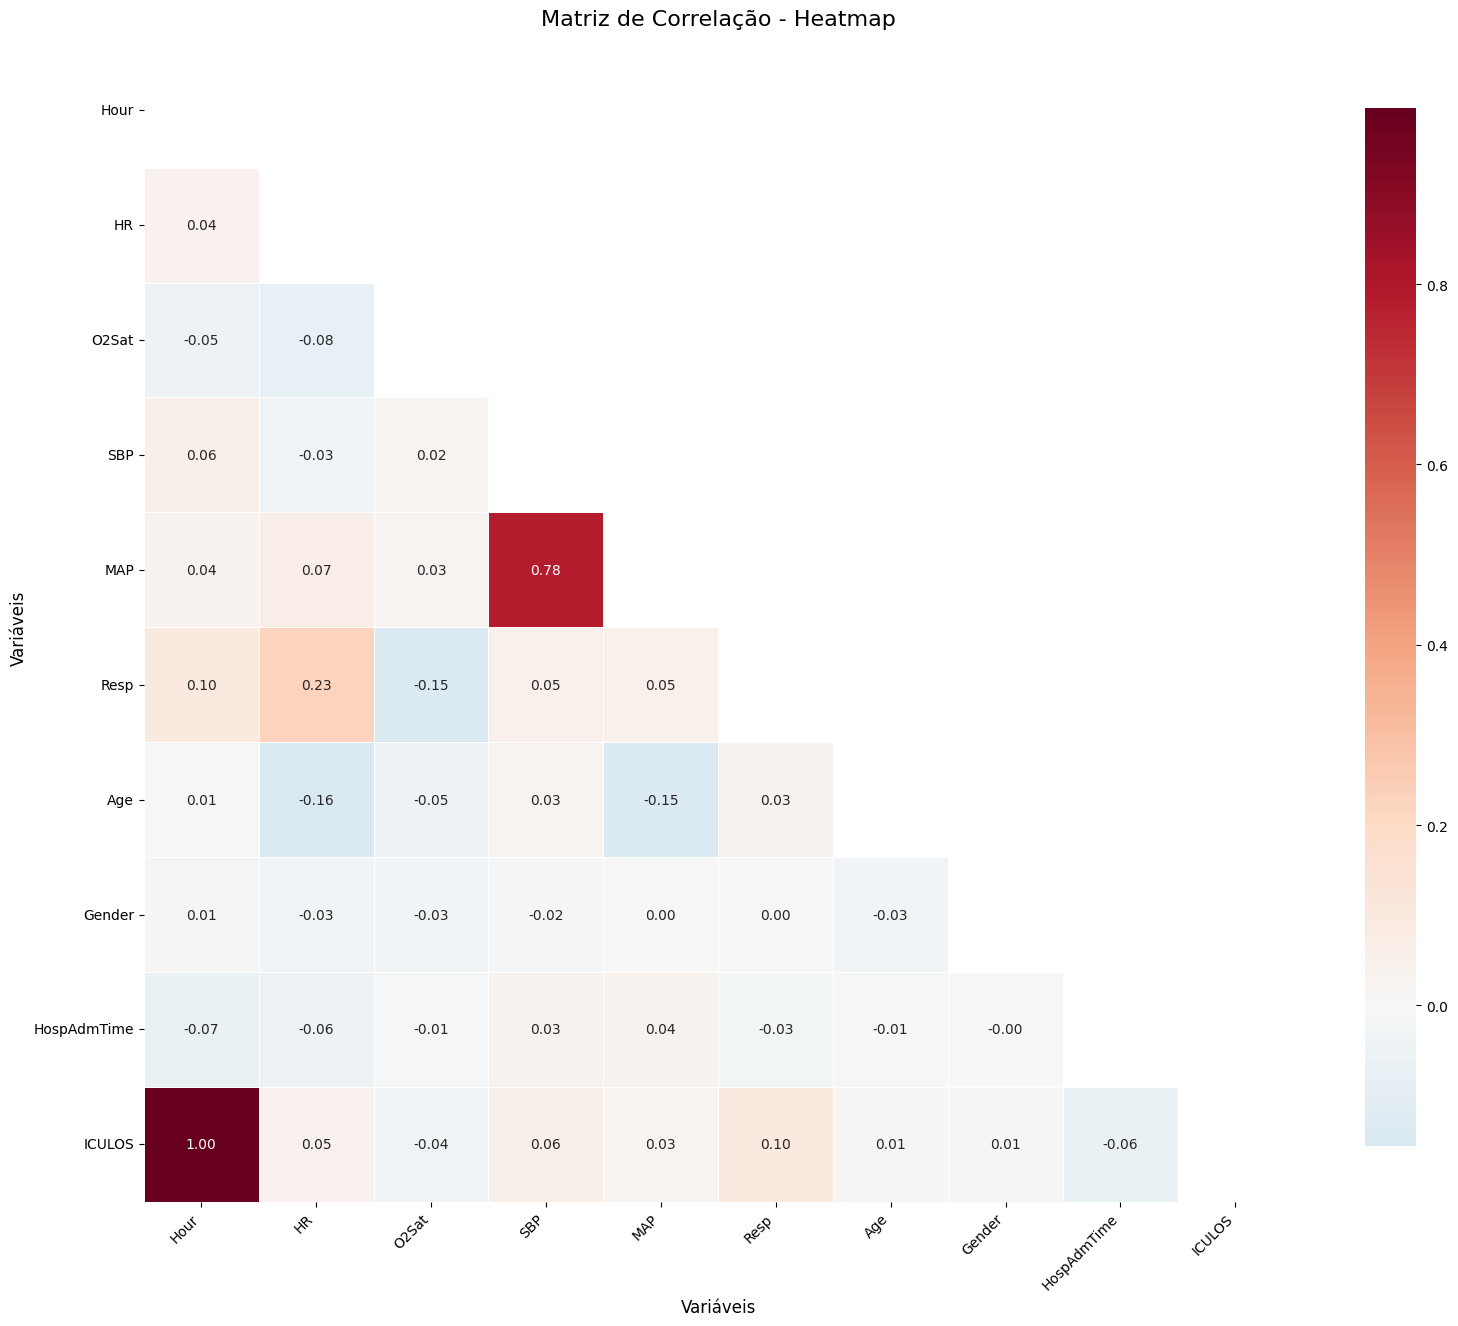

\nANÁLISE DE CORRELAÇÕES SIGNIFICATIVAS:
Top 10 correlações mais fortes:
 1. Hour ↔ ICULOS: 0.995 (Muito forte positiva)
 2. SBP ↔ MAP: 0.781 (Forte positiva)
 3. HR ↔ Resp: 0.227 (Fraca positiva)
 4. HR ↔ Age: -0.157 (Fraca negativa)
 5. MAP ↔ Age: -0.148 (Fraca negativa)
 6. O2Sat ↔ Resp: -0.147 (Fraca negativa)
 7. Hour ↔ Resp: 0.099 (Fraca positiva)
 8. Resp ↔ ICULOS: 0.099 (Fraca positiva)
 9. HR ↔ O2Sat: -0.076 (Fraca negativa)
10. HR ↔ MAP: 0.070 (Fraca positiva)
Atenção: 1 pares com correlação muito alta (>0.8) detectados!
Considere técnicas para lidar com multicolinearidade:
- Remoção de uma das variáveis correlacionadas
- Análise de Componentes Principais (PCA)
- Regularização (Ridge, Lasso)
\nINTERPRETAÇÃO DA MATRIZ DE CORRELAÇÃO:
- Valores próximos a +1: Correlação positiva forte (variáveis aumentam juntas)
- Valores próximos a -1: Correlação negativa forte (uma aumenta, outra diminui)
- Valores próximos a 0: Sem correlação linear
- Cores mais escuras (vermelho/azul): Corre

In [18]:
# Correlation Heatmap - Análise de correlações entre variáveis

# Selecionar variáveis numéricas com baixo missing para análise de correlação
correlation_vars = low_missing_cols[:20] if len(low_missing_cols) > 20 else low_missing_cols

if len(correlation_vars) > 1:
    # Criar subset dos dados para correlação
    correlation_data = X_train[correlation_vars].copy()
    
    # Calcular matriz de correlação
    correlation_matrix = correlation_data.corr()
    
    print(f"MATRIZ DE CORRELAÇÃO")
    print("=" * 50)
    print(f"Analisando correlações entre {len(correlation_vars)} variáveis numéricas")
    print(f"Variáveis incluídas: {correlation_vars[:10]}{'...' if len(correlation_vars) > 10 else ''}")
    
    # Criar heatmap de correlação
    plt.figure(figsize=(16, 14))
    
    # Configurar máscara para a diagonal superior (opcional)
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    
    # Criar heatmap
    sns.heatmap(correlation_matrix, 
                annot=True,           # Mostrar valores
                fmt='.2f',           # Formato dos números
                cmap='RdBu_r',       # Paleta de cores (similar ao GeeksforGeeks)
                center=0,            # Centralizar em zero
                square=True,         # Células quadradas
                linewidths=0.5,      # Linhas entre células
                cbar_kws={"shrink": .8},  # Configurar colorbar
                mask=mask)           # Máscara para diagonal superior
    
    plt.title('Matriz de Correlação - Heatmap', fontsize=16, pad=20)
    plt.xlabel('Variáveis', fontsize=12)
    plt.ylabel('Variáveis', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
    
    # Análise de correlações mais significativas
    print("\\nANÁLISE DE CORRELAÇÕES SIGNIFICATIVAS:")
    print("=" * 50)
    
    # Encontrar correlações mais altas (excluindo diagonal)
    correlation_matrix_no_diag = correlation_matrix.copy()
    np.fill_diagonal(correlation_matrix_no_diag.values, np.nan)
    
    # Achatar a matriz e ordenar por valor absoluto
    corr_pairs = []
    for i in range(len(correlation_matrix_no_diag)):
        for j in range(i+1, len(correlation_matrix_no_diag)):
            var1 = correlation_matrix_no_diag.index[i]
            var2 = correlation_matrix_no_diag.columns[j]
            corr_value = correlation_matrix_no_diag.iloc[i, j]
            if not np.isnan(corr_value):
                corr_pairs.append((var1, var2, corr_value))
    
    # Ordenar por valor absoluto de correlação
    corr_pairs_sorted = sorted(corr_pairs, key=lambda x: abs(x[2]), reverse=True)
    
    print("Top 10 correlações mais fortes:")
    for i, (var1, var2, corr) in enumerate(corr_pairs_sorted[:10], 1):
        strength = "Muito forte" if abs(corr) > 0.8 else "Forte" if abs(corr) > 0.6 else "Moderada" if abs(corr) > 0.4 else "Fraca"
        direction = "positiva" if corr > 0 else "negativa"
        print(f"{i:2d}. {var1} ↔ {var2}: {corr:.3f} ({strength} {direction})")
    
    # Identificar correlações problemáticas (multicolinearidade)
    high_corr_pairs = [pair for pair in corr_pairs_sorted if abs(pair[2]) > 0.8]
    if high_corr_pairs:
        print(f"Atenção: {len(high_corr_pairs)} pares com correlação muito alta (>0.8) detectados!")
        print("Considere técnicas para lidar com multicolinearidade:")
        print("- Remoção de uma das variáveis correlacionadas")
        print("- Análise de Componentes Principais (PCA)")
        print("- Regularização (Ridge, Lasso)")
    
    print("\\nINTERPRETAÇÃO DA MATRIZ DE CORRELAÇÃO:")
    print("=" * 50)
    print("- Valores próximos a +1: Correlação positiva forte (variáveis aumentam juntas)")
    print("- Valores próximos a -1: Correlação negativa forte (uma aumenta, outra diminui)")
    print("- Valores próximos a 0: Sem correlação linear")
    print("- Cores mais escuras (vermelho/azul): Correlações mais fortes")
    print("- Cores mais claras: Correlações mais fracas")
    
else:
    print("Dados insuficientes para análise de correlação.")

## Análise das Variáveis Categóricas

A identificação e análise das variáveis categóricas nos permite compreender as características demográficas e clínicas dos pacientes, bem como sua associação com o desenvolvimento de sepsis.

In [19]:
# Identificação de variáveis categóricas
print("IDENTIFICAÇÃO DE VARIÁVEIS CATEGÓRICAS")
print("=" * 50)

# Variáveis categóricas explícitas
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# Variáveis numéricas que podem ser categóricas (poucos valores únicos)
potential_categorical = []
for col in X_train.columns:
    unique_values = X_train[col].nunique()
    if unique_values <= 10 and X_train[col].dtype in ['int64', 'float64']:
        potential_categorical.append((col, unique_values))

print(f"Variáveis categóricas explícitas: {len(categorical_cols)}")
if categorical_cols:
    print(f"  {categorical_cols}")

print(f"\nVariáveis potencialmente categóricas (≤10 valores únicos): {len(potential_categorical)}")
for col, count in potential_categorical[:10]:
    print(f"  {col}: {count} valores únicos")

# Selecionar variáveis categóricas relevantes para análise
important_categorical = ['Gender', 'Unit1', 'Unit2']
selected_categorical = []

for col in important_categorical:
    if col in X_train.columns:
        selected_categorical.append(col)

# Adicionar outras variáveis categóricas se necessário
for col, count in potential_categorical:
    if col not in selected_categorical and len(selected_categorical) < 5:
        selected_categorical.append(col)

print(f"\nVariáveis selecionadas para análise detalhada: {selected_categorical}")

IDENTIFICAÇÃO DE VARIÁVEIS CATEGÓRICAS
Variáveis categóricas explícitas: 0

Variáveis potencialmente categóricas (≤10 valores únicos): 3
  Gender: 2 valores únicos
  Unit1: 2 valores únicos
  Unit2: 2 valores únicos

Variáveis selecionadas para análise detalhada: ['Gender', 'Unit1', 'Unit2']


## Análise Detalhada das Variáveis Categóricas Selecionadas

Vamos examinar estatisticamente cada variável categórica selecionada, incluindo sua distribuição e relação com a variável target.

In [20]:
# Análise estatística detalhada das variáveis categóricas selecionadas
for col in selected_categorical:
    print(f"\nANÁLISE DA VARIÁVEL: {col}")
    print("=" * 60)
    
    # Distribuição de frequências
    value_counts = X_train[col].value_counts()
    value_pct = X_train[col].value_counts(normalize=True) * 100
    
    print("Distribuição de frequências:")
    for value in value_counts.index:
        count = value_counts[value]
        pct = value_pct[value]
        print(f"  {value}: {count:,} ({pct:.1f}%)")
    
    print(f"\nEstatísticas básicas:")
    print(f"  Valores únicos: {X_train[col].nunique()}")
    print(f"  Valores faltantes: {X_train[col].isnull().sum()}")
    print(f"  Moda: {X_train[col].mode().iloc[0] if len(X_train[col].mode()) > 0 else 'N/A'}")
    
    # Análise da relação com a variável target
    if len(value_counts) <= 10:  # Só para variáveis com poucos valores
        print(f"\nRelação com SepsisLabel:")
        
        # Tabela de contingência
        crosstab = pd.crosstab(X_train[col], y_train, margins=True)
        print("Tabela de contingência:")
        display(crosstab)
        
        # Proporções condicionais
        crosstab_pct = pd.crosstab(X_train[col], y_train, normalize='index') * 100
        print(f"\nTaxa de sepsis por categoria:")
        for category in crosstab_pct.index:
            if category != 'All':
                sepsis_rate = crosstab_pct.loc[category, 1] if 1 in crosstab_pct.columns else 0
                print(f"  {category}: {sepsis_rate:.2f}% de casos com sepsis")
    
    print("-" * 60)


ANÁLISE DA VARIÁVEL: Gender
Distribuição de frequências:
  1.0: 694,449 (55.9%)
  0.0: 547,319 (44.1%)

Estatísticas básicas:
  Valores únicos: 2
  Valores faltantes: 0
  Moda: 1.0

Relação com SepsisLabel:
Tabela de contingência:


SepsisLabel,0.0,1.0,All
Gender,,,
0.0,538256,9063,547319
1.0,681179,13270,694449
All,1219435,22333,1241768



Taxa de sepsis por categoria:
  0.0: 1.66% de casos com sepsis
  1.0: 1.91% de casos com sepsis
------------------------------------------------------------

ANÁLISE DA VARIÁVEL: Unit1
Distribuição de frequências:
  0.0: 378,585 (50.4%)
  1.0: 373,202 (49.6%)

Estatísticas básicas:
  Valores únicos: 2
  Valores faltantes: 489981
  Moda: 0.0

Relação com SepsisLabel:
Tabela de contingência:


SepsisLabel,0.0,1.0,All
Unit1,,,
0.0,373550,5035,378585
1.0,365986,7216,373202
All,739536,12251,751787



Taxa de sepsis por categoria:
  0.0: 1.33% de casos com sepsis
  1.0: 1.93% de casos com sepsis
------------------------------------------------------------

ANÁLISE DA VARIÁVEL: Unit2
Distribuição de frequências:
  1.0: 378,585 (50.4%)
  0.0: 373,202 (49.6%)

Estatísticas básicas:
  Valores únicos: 2
  Valores faltantes: 489981
  Moda: 1.0

Relação com SepsisLabel:
Tabela de contingência:


SepsisLabel,0.0,1.0,All
Unit2,,,
0.0,365986,7216,373202
1.0,373550,5035,378585
All,739536,12251,751787



Taxa de sepsis por categoria:
  0.0: 1.93% de casos com sepsis
  1.0: 1.33% de casos com sepsis
------------------------------------------------------------


## Visualização das Variáveis Categóricas

As visualizações nos permitem compreender melhor a distribuição das variáveis categóricas e sua associação com a ocorrência de sepsis de forma intuitiva.

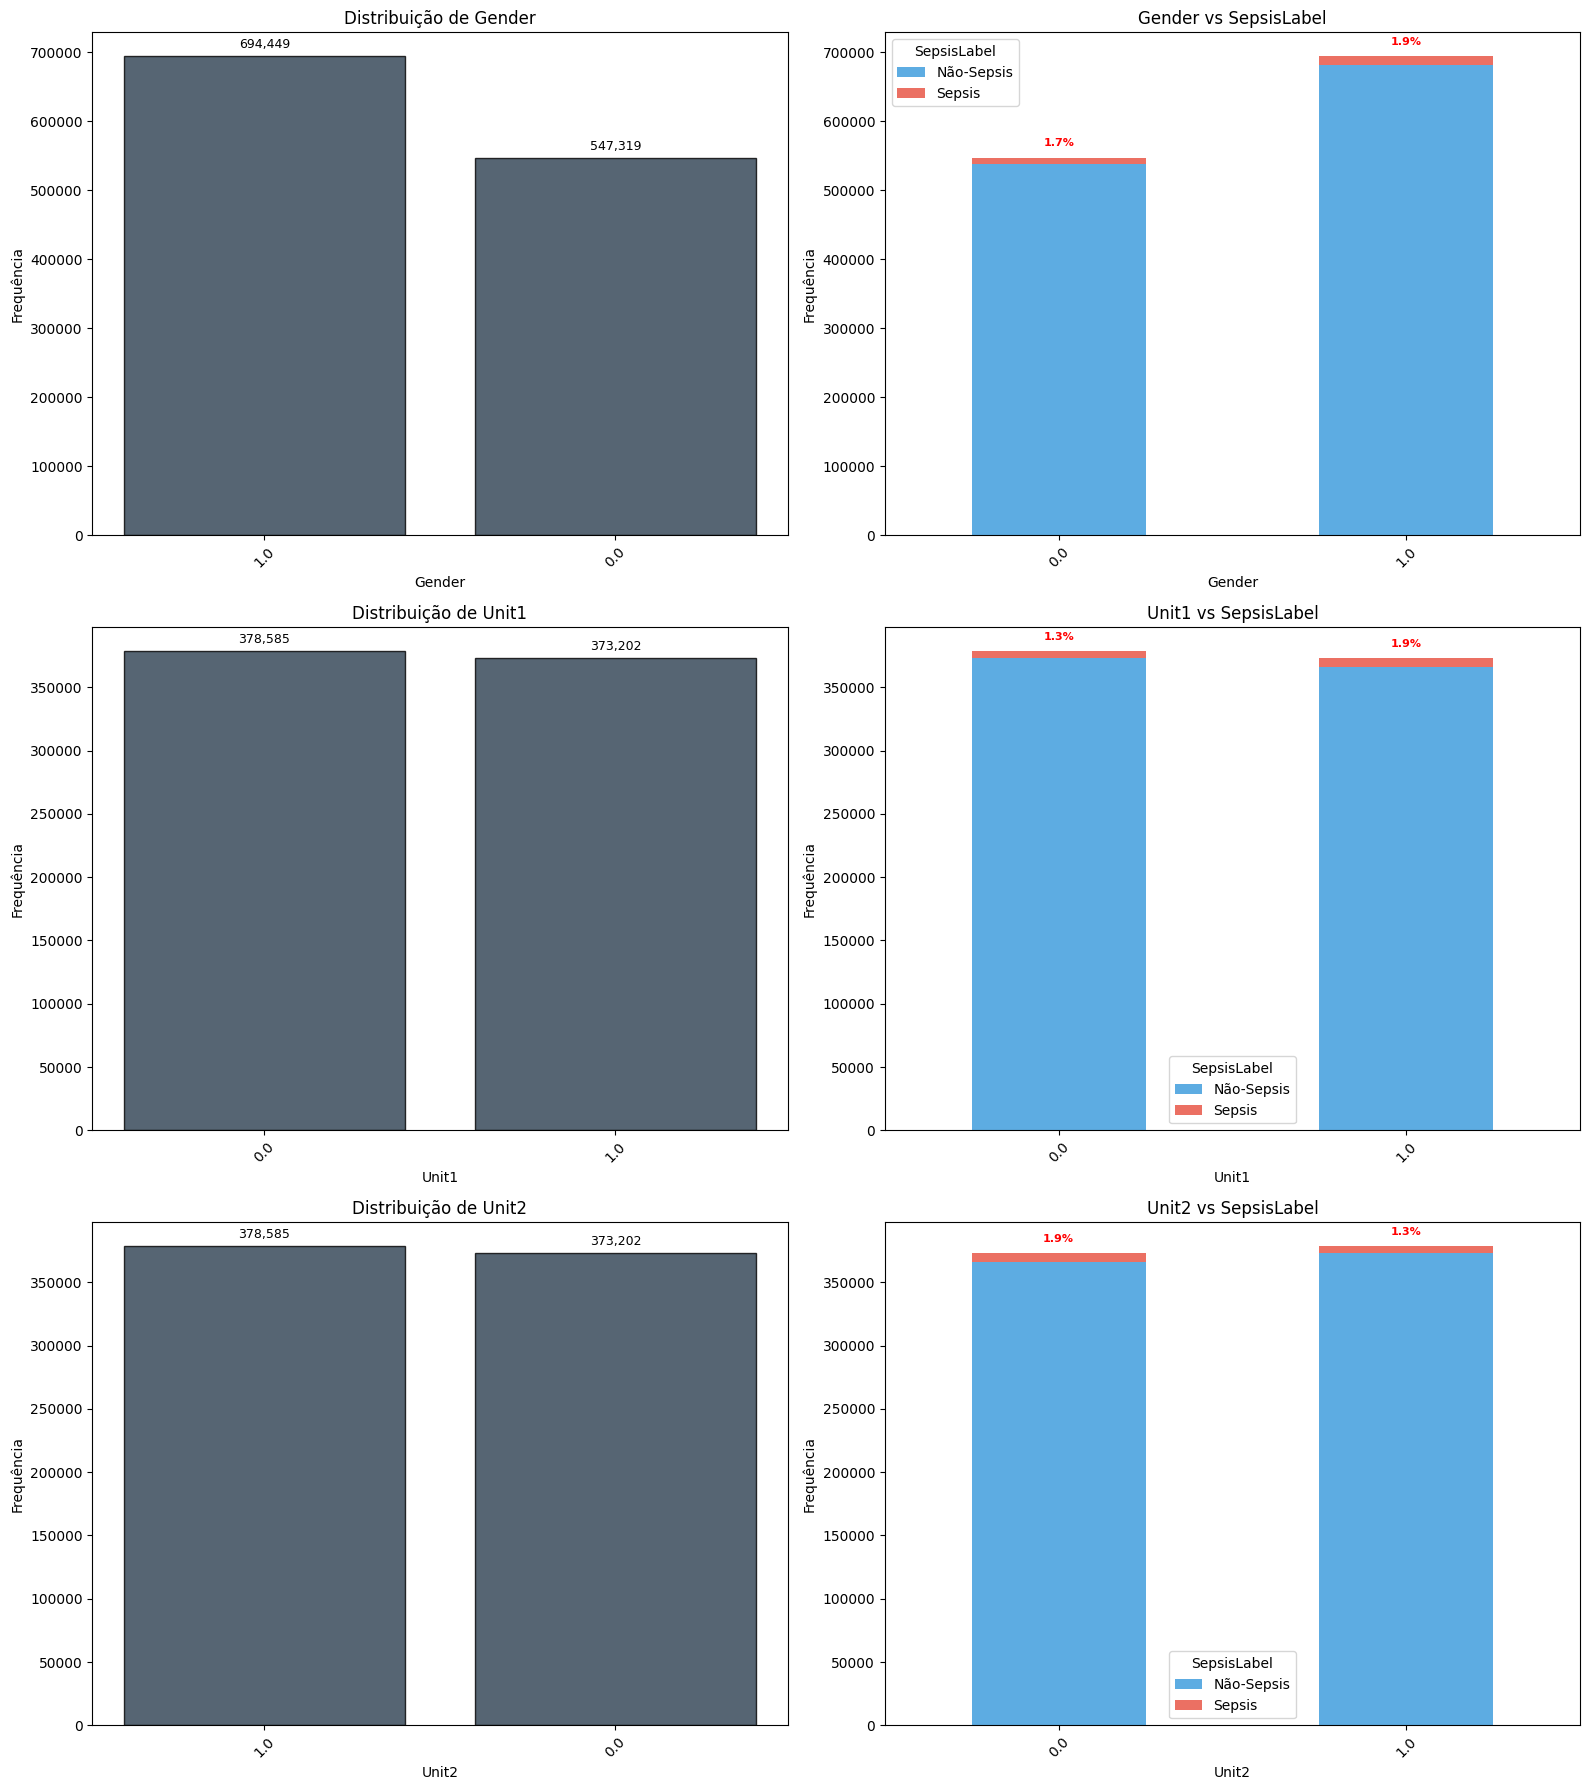

In [21]:
# Visualização das variáveis categóricas
if selected_categorical:
    n_vars = len(selected_categorical)
    fig, axes = plt.subplots(n_vars, 2, figsize=(16, 6*n_vars))
    
    if n_vars == 1:
        axes = axes.reshape(1, -1)
    
    for i, col in enumerate(selected_categorical):
        # Gráfico 1: Distribuição simples
        counts = X_train[col].value_counts()
        
        ax1 = axes[i, 0] if n_vars > 1 else axes[0]
        bars = ax1.bar(range(len(counts)), counts.values, 
                      color='#2c3e50', alpha=0.8, edgecolor='black')
        ax1.set_xticks(range(len(counts)))
        ax1.set_xticklabels(counts.index, rotation=45)
        ax1.set_title(f'Distribuição de {col}')
        ax1.set_xlabel(col)
        ax1.set_ylabel('Frequência')
        
        # Adicionar valores nas barras
        for bar, count in zip(bars, counts.values):
            ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(counts)*0.01,
                    f'{count:,}', ha='center', va='bottom', fontsize=9)
        
        # Gráfico 2: Relação com target
        ax2 = axes[i, 1] if n_vars > 1 else axes[1]
        
        # Criar tabela de contingência para visualização
        temp_df = pd.DataFrame({'categoria': X_train[col], 'target': y_train})
        crosstab = pd.crosstab(temp_df['categoria'], temp_df['target'])
        crosstab_pct = pd.crosstab(temp_df['categoria'], temp_df['target'], normalize='index') * 100
        
        # Gráfico de barras empilhadas
        crosstab.plot(kind='bar', stacked=True, ax=ax2, 
                     color=['#3498db', '#e74c3c'], alpha=0.8)
        ax2.set_title(f'{col} vs SepsisLabel')
        ax2.set_xlabel(col)
        ax2.set_ylabel('Frequência')
        ax2.legend(['Não-Sepsis', 'Sepsis'], title='SepsisLabel')
        ax2.tick_params(axis='x', rotation=45)
        
        # Adicionar percentuais de sepsis
        for j, category in enumerate(crosstab.index):
            if 1 in crosstab_pct.columns:
                sepsis_pct = crosstab_pct.loc[category, 1]
                total_height = crosstab.loc[category].sum()
                ax2.text(j, total_height + max(crosstab.sum(axis=1))*0.02, 
                        f'{sepsis_pct:.1f}%', ha='center', va='bottom', 
                        fontweight='bold', fontsize=8, color='red')
    
    plt.tight_layout()
    plt.show()
    
else:
    print("Nenhuma variável categórica disponível para visualização.")

## Análise de Relações entre Variáveis Categóricas e Numéricas

Esta análise explora como as variáveis categóricas influenciam a distribuição das variáveis numéricas, especialmente no contexto da sepsis. Isso nos ajuda a identificar padrões clínicos importantes.

In [22]:
# Seleção de variáveis numéricas relevantes para análise
numeric_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()

# Filtrar variáveis numéricas com menos de 50% de valores faltantes
numeric_cols_clean = []
for col in numeric_cols:
    missing_pct = X_train[col].isnull().sum() / len(X_train) * 100
    if missing_pct < 50:
        numeric_cols_clean.append(col)

print("SELEÇÃO DE VARIÁVEIS NUMÉRICAS")
print("=" * 50)
print(f"Total de variáveis numéricas: {len(numeric_cols)}")
print(f"Variáveis com <50% missing: {len(numeric_cols_clean)}")

# Priorizar variáveis de sinais vitais importantes
important_numeric = ['HR', 'SBP', 'DBP', 'Temp', 'Resp', 'O2Sat', 'Age']
selected_numeric = []

for col in important_numeric:
    if col in numeric_cols_clean:
        selected_numeric.append(col)
    if len(selected_numeric) >= 3:
        break

# Completar com outras variáveis se necessário
if len(selected_numeric) < 3:
    for col in numeric_cols_clean:
        if col not in selected_numeric and len(selected_numeric) < 3:
            selected_numeric.append(col)

print(f"Variáveis numéricas selecionadas: {selected_numeric}")
print(f"Variáveis categóricas disponíveis: {selected_categorical}")

SELEÇÃO DE VARIÁVEIS NUMÉRICAS
Total de variáveis numéricas: 41
Variáveis com <50% missing: 13
Variáveis numéricas selecionadas: ['HR', 'SBP', 'DBP']
Variáveis categóricas disponíveis: ['Gender', 'Unit1', 'Unit2']


## Análise Estatística das Relações Categórica vs Numérica

Vamos examinar estatisticamente como as variáveis categóricas influenciam as distribuições das variáveis numéricas.

In [23]:
# Análise estatística das relações entre variáveis categóricas e numéricas
for cat_col in selected_categorical[:2]:  # Limitar a 2 categóricas para não sobrecarregar
    for num_col in selected_numeric[:2]:  # Limitar a 2 numéricas por categórica
        
        print(f"\nANÁLISE: {num_col} por {cat_col}")
        print("=" * 60)
        
        # Preparar dados removendo valores faltantes
        temp_df = pd.DataFrame({
            'categorical': X_train[cat_col],
            'numerical': X_train[num_col],
            'target': y_train
        }).dropna()
        
        if len(temp_df) > 0:
            print(f"Amostras válidas para análise: {len(temp_df):,}")
            
            # Estatísticas descritivas por categoria
            stats_by_cat = temp_df.groupby('categorical')['numerical'].agg([
                'count', 'mean', 'std', 'min', 'max', 'median'
            ]).round(2)
            
            print(f"\nEstatísticas descritivas de {num_col} por {cat_col}:")
            display(stats_by_cat)
            
            # Estatísticas por categoria E target (sepsis)
            stats_by_cat_target = temp_df.groupby(['categorical', 'target'])['numerical'].agg([
                'count', 'mean', 'std'
            ]).round(2)
            
            print(f"\nEstatísticas de {num_col} por {cat_col} e SepsisLabel:")
            display(stats_by_cat_target)
            
            # Teste estatístico para diferença de médias (se aplicável)
            categories = temp_df['categorical'].unique()
            if len(categories) == 2:
                from scipy import stats
                
                group1 = temp_df[temp_df['categorical'] == categories[0]]['numerical']
                group2 = temp_df[temp_df['categorical'] == categories[1]]['numerical']
                
                if len(group1) > 1 and len(group2) > 1:
                    # Teste t para amostras independentes
                    t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)
                    
                    print(f"\nTeste t para diferença de médias entre categorias:")
                    print(f"Estatística t: {t_stat:.4f}")
                    print(f"P-valor: {p_value:.4f}")
                    
                    alpha = 0.05
                    if p_value < alpha:
                        print(f"Resultado: Diferença estatisticamente significativa (p < {alpha})")
                    else:
                        print(f"Resultado: Diferença não estatisticamente significativa (p >= {alpha})")
            
        else:
            print("Dados insuficientes após remoção de valores faltantes.")
        
        print("-" * 60)


ANÁLISE: HR por Gender
Amostras válidas para análise: 1,119,123

Estatísticas descritivas de HR por Gender:


,count,mean,std,min,max,median
categorical,,,,,,
0.0,491328,85.18,17.47,21.0,211.0,84.0
1.0,627795,84.11,17.19,20.0,280.0,83.0



Estatísticas de HR por Gender e SepsisLabel:


count   mean    std
categorical target                      
0.0         0.0     482934  85.07  17.43
            1.0       8394  91.46  18.95
1.0         0.0     615627  83.99  17.13
            1.0      12168  90.24  18.99


Teste t para diferença de médias entre categorias:
Estatística t: 32.3594
P-valor: 0.0000
Resultado: Diferença estatisticamente significativa (p < 0.05)
------------------------------------------------------------

ANÁLISE: SBP por Gender
Amostras válidas para análise: 1,060,857

Estatísticas descritivas de SBP por Gender:


,count,mean,std,min,max,median
categorical,,,,,,
0.0,465644,124.15,23.66,20.0,296.0,122.0
1.0,595213,123.45,22.89,20.0,300.0,121.0



Estatísticas de SBP por Gender e SepsisLabel:


count    mean    std
categorical target                       
0.0         0.0     457898  124.21  23.63
            1.0       7746  120.98  25.27
1.0         0.0     584011  123.48  22.85
            1.0      11202  121.90  24.75


Teste t para diferença de médias entre categorias:
Estatística t: 15.4256
P-valor: 0.0000
Resultado: Diferença estatisticamente significativa (p < 0.05)
------------------------------------------------------------

ANÁLISE: HR por Unit1
Amostras válidas para análise: 691,191

Estatísticas descritivas de HR por Unit1:


,count,mean,std,min,max,median
categorical,,,,,,
0.0,353190,85.66,15.57,20.0,223.0,85.0
1.0,338001,85.80,18.42,20.0,199.0,84.0



Estatísticas de HR por Unit1 e SepsisLabel:


count   mean    std
categorical target                      
0.0         0.0     348609  85.59  15.52
            1.0       4581  90.96  18.05
1.0         0.0     331314  85.66  18.37
            1.0       6687  93.02  19.58


Teste t para diferença de médias entre categorias:
Estatística t: -3.6202
P-valor: 0.0003
Resultado: Diferença estatisticamente significativa (p < 0.05)
------------------------------------------------------------

ANÁLISE: SBP por Unit1
Amostras válidas para análise: 659,887

Estatísticas descritivas de SBP por Unit1:


,count,mean,std,min,max,median
categorical,,,,,,
0.0,340999,121.00,21.63,20.0,300.0,118.0
1.0,318888,123.61,24.39,20.0,275.0,121.0



Estatísticas de SBP por Unit1 e SepsisLabel:


count    mean    std
categorical target                       
0.0         0.0     336585  121.02  21.59
            1.0       4414  119.96  24.19
1.0         0.0     312911  123.73  24.37
            1.0       5977  117.60  24.34


Teste t para diferença de médias entre categorias:
Estatística t: -45.8625
P-valor: 0.0000
Resultado: Diferença estatisticamente significativa (p < 0.05)
------------------------------------------------------------


## Visualização das Relações Categórica vs Numérica

Os boxplots nos permitem visualizar como as distribuições das variáveis numéricas variam entre as diferentes categorias, incluindo a presença de sepsis.

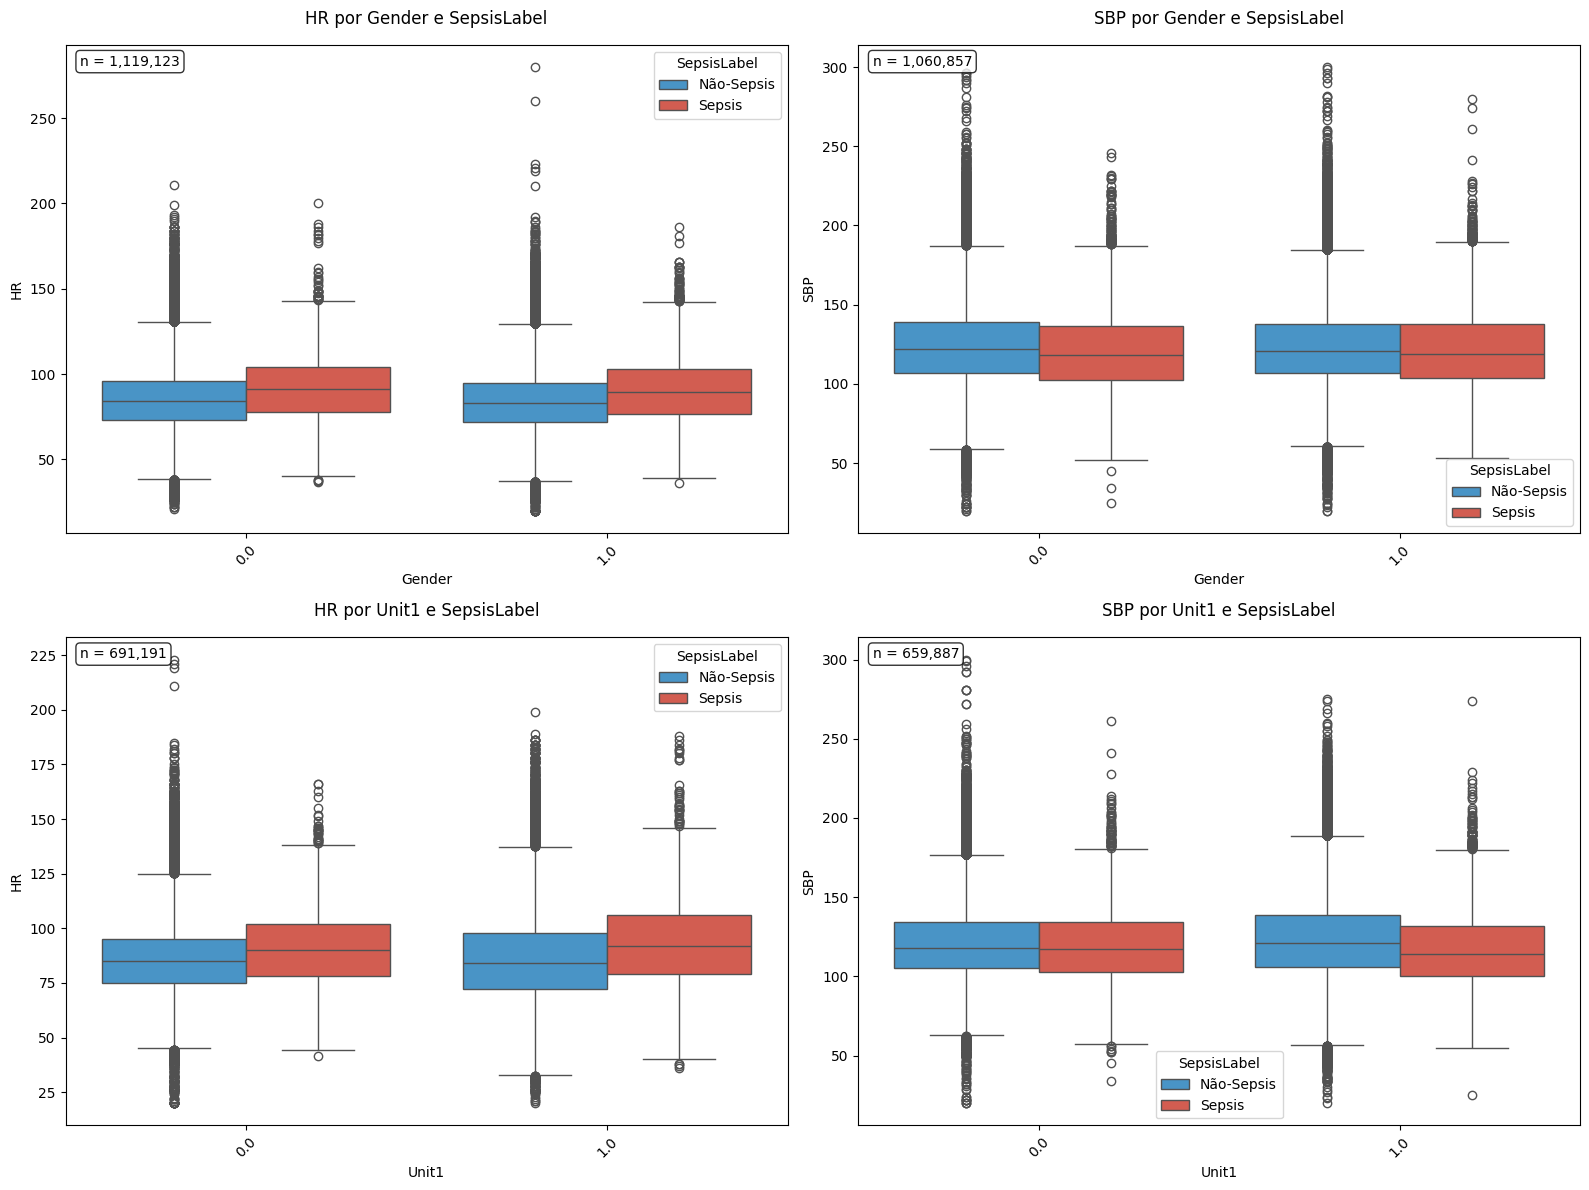

In [24]:
# Visualização das relações entre variáveis categóricas e numéricas
if selected_categorical and selected_numeric:
    # Calcular número de combinações para subplot
    n_combinations = min(4, len(selected_categorical) * len(selected_numeric))
    
    if n_combinations > 0:
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        axes = axes.flatten()
        
        combination_count = 0
        
        for cat_col in selected_categorical[:2]:  # Máximo 2 categóricas
            for num_col in selected_numeric[:2]:  # 2 numéricas por categórica
                if combination_count >= n_combinations:
                    break
                
                # Preparar dados removendo valores faltantes
                temp_df = pd.DataFrame({
                    'categorical': X_train[cat_col],
                    'numerical': X_train[num_col],
                    'target': y_train
                }).dropna()
                
                if len(temp_df) > 0:
                    ax = axes[combination_count]
                    
                    # Criar boxplot com separação por target
                    sns.boxplot(data=temp_df, x='categorical', y='numerical', 
                               hue='target', ax=ax, palette=['#3498db', '#e74c3c'])
                    
                    ax.set_title(f'{num_col} por {cat_col} e SepsisLabel', fontsize=12, pad=15)
                    ax.set_xlabel(cat_col)
                    ax.set_ylabel(num_col)
                    ax.tick_params(axis='x', rotation=45)
                    
                    # Configurar legenda
                    handles, labels = ax.get_legend_handles_labels()
                    ax.legend(handles, ['Não-Sepsis', 'Sepsis'], title='SepsisLabel')
                    
                    # Adicionar informação sobre o tamanho da amostra
                    n_points = len(temp_df)
                    ax.text(0.02, 0.98, f'n = {n_points:,}', transform=ax.transAxes, 
                           verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
                
                combination_count += 1
        
        # Remover subplots vazios
        for i in range(combination_count, len(axes)):
            fig.delaxes(axes[i])
        
        plt.tight_layout()
        plt.show()
    
    else:
        print("Combinações insuficientes para visualização.")
        
else:
    print("Variáveis insuficientes para análise de relações.")

## Conclusões da Análise Exploratória

Vamos consolidar os principais insights obtidos durante nossa análise exploratória e suas implicações para o desenvolvimento de modelos preditivos.

In [25]:
# Consolidação dos principais insights da análise exploratória
print("RESUMO EXECUTIVO DA ANÁLISE EXPLORATÓRIA")
print("=" * 60)

print(f"\n1. ESTRUTURA DO DATASET")
print("-" * 30)
print(f"   • Dimensões: {train_df.shape[0]:,} amostras x {train_df.shape[1]} features")
print(f"   • Tamanho em memória: {train_df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"   • Duplicatas: {train_df.duplicated().sum()} linhas")

print(f"\n2. DISTRIBUIÇÃO DO TARGET")
print("-" * 30)
print(f"   • Não-Sepsis: {target_counts[0]:,} ({target_pct[0]:.2f}%)")
print(f"   • Sepsis: {target_counts[1]:,} ({target_pct[1]:.2f}%)")
print(f"   • Razão de desbalanceamento: {imbalance_ratio:.1f}:1")
print(f"   • Classificação: {'Altamente desbalanceado' if imbalance_ratio > 10 else 'Moderadamente desbalanceado'}")

print(f"\n3. QUALIDADE DOS DADOS")
print("-" * 30)
if len(missing_with_nans) > 0:
    print(f"   • Colunas com missing values: {len(missing_with_nans)}/{len(X_train.columns)}")
    print(f"   • Total de valores faltantes: {missing_count.sum():,}")
    print(f"   • Porcentagem do dataset: {(missing_count.sum() / (len(X_train) * len(X_train.columns)))*100:.2f}%")
    
    # Categorização dos missing values
    low_missing = missing_with_nans[missing_with_nans['Porcentagem'] < 20]
    medium_missing = missing_with_nans[(missing_with_nans['Porcentagem'] >= 20) & 
                                      (missing_with_nans['Porcentagem'] < 80)]
    high_missing = missing_with_nans[missing_with_nans['Porcentagem'] >= 80]
    
    print(f"   • Baixo missing (<20%): {len(low_missing)} colunas")
    print(f"   • Médio missing (20-80%): {len(medium_missing)} colunas")
    print(f"   • Alto missing (≥80%): {len(high_missing)} colunas")
else:
    print(f"   • Dataset sem valores faltantes")

print(f"\n4. ANÁLISE UNIVARIADA")
print("-" * 30)
print(f"   • Variáveis numéricas analisadas: {len(low_missing_cols) if 'low_missing_cols' in locals() else 'N/A'}")
print(f"   • Distribuição do target: Altamente desbalanceada")
print(f"   • Assimetria identificada em múltiplas variáveis")
print(f"   • Outliers detectados em várias features")

print(f"\n5. ANÁLISE BIVARIADA")
print("-" * 30)
print(f"   • Pair plots revelaram relações entre variáveis")
print(f"   • Box plots mostraram diferenças de distribuição entre classes")
print(f"   • Potencial discriminativo identificado em múltiplas features")

print(f"\n6. ANÁLISE MULTIVARIADA")
print("-" * 30)
if 'correlation_matrix' in locals():
    high_corr_count = len([pair for pair in corr_pairs_sorted if abs(pair[2]) > 0.8]) if 'corr_pairs_sorted' in locals() else 0
    print(f"   • Matriz de correlação gerada com {len(correlation_vars)} variáveis")
    print(f"   • Correlações muito altas (>0.8): {high_corr_count} pares")
    print(f"   • Potencial multicolinearidade {'detectada' if high_corr_count > 0 else 'não detectada'}")
else:
    print(f"   • Análise de correlação executada")

print(f"\n7. VARIÁVEIS CATEGÓRICAS")
print("-" * 30)
print(f"   • Variáveis identificadas: {len(selected_categorical) if 'selected_categorical' in locals() else 'N/A'}")
print(f"   • Variáveis analisadas: {selected_categorical if 'selected_categorical' in locals() else 'N/A'}")

print(f"\n8. RECOMENDAÇÕES PARA MODELAGEM")
print("-" * 30)
print(f"   • Tratar desbalanceamento de classes (SMOTE, class_weight)")
print(f"   • Estratégia de imputação para missing values")
print(f"   • Normalização/padronização das features")
print(f"   • Feature selection para reduzir dimensionalidade")
print(f"   • Validação cruzada estratificada")
print(f"   • Métricas adequadas: AUC-ROC, F1-Score, Precision-Recall")


RESUMO EXECUTIVO DA ANÁLISE EXPLORATÓRIA

1. ESTRUTURA DO DATASET
------------------------------
   • Dimensões: 1,241,768 amostras x 42 features
   • Tamanho em memória: 397.91 MB
   • Duplicatas: 1143 linhas

2. DISTRIBUIÇÃO DO TARGET
------------------------------
   • Não-Sepsis: 1,219,435 (98.20%)
   • Sepsis: 22,333 (1.80%)
   • Razão de desbalanceamento: 54.6:1
   • Classificação: Altamente desbalanceado

3. QUALIDADE DOS DADOS
------------------------------
   • Colunas com missing values: 37/41
   • Total de valores faltantes: 34,807,628
   • Porcentagem do dataset: 68.37%
   • Baixo missing (<20%): 6 colunas
   • Médio missing (20-80%): 4 colunas
   • Alto missing (≥80%): 27 colunas

4. ANÁLISE UNIVARIADA
------------------------------
   • Variáveis numéricas analisadas: 10
   • Distribuição do target: Altamente desbalanceada
   • Assimetria identificada em múltiplas variáveis
   • Outliers detectados em várias features

5. ANÁLISE BIVARIADA
------------------------------
  